# Project Description

Our top priority in this business problem is to identify customers who are getting churned. 
Even if we predict non-churning customers as churned, it won't harm our business. 
But predicting churning customers as Non-churning will do. So recall (TP/TP+FN) need to be higher.

Metric: recall rate

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
drop_columns = ['CLIENTNUM',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

# Remove CLIENTNUM and the Naive_Bayes_Classifiers
data_raw = df.drop(drop_columns,errors='ignore',axis=1)

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [5]:
data_raw.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [6]:
data_raw.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# EDA

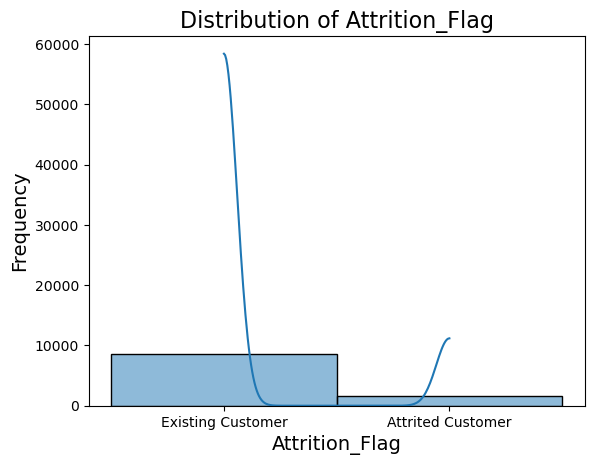

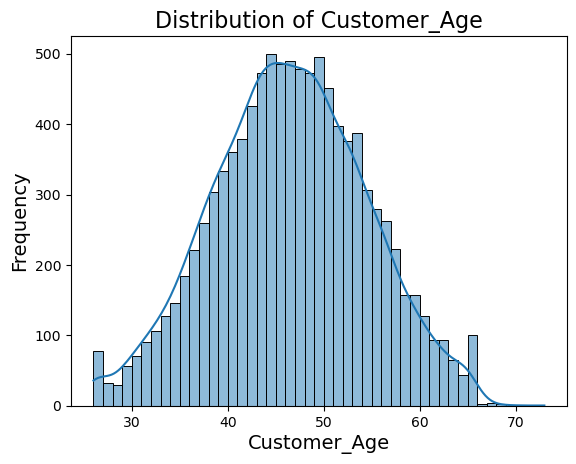

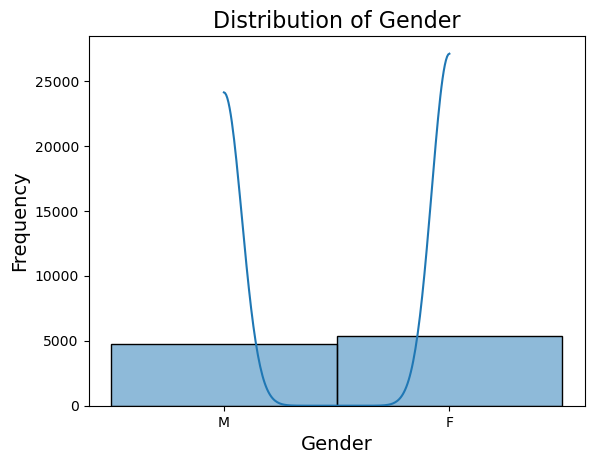

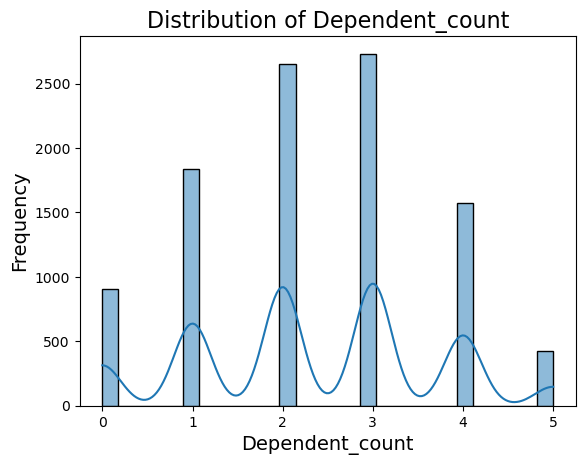

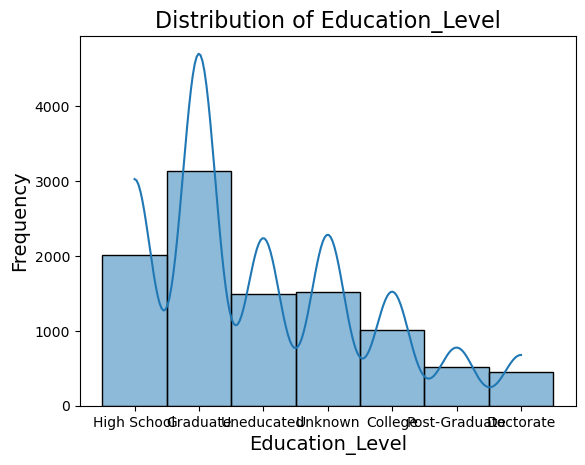

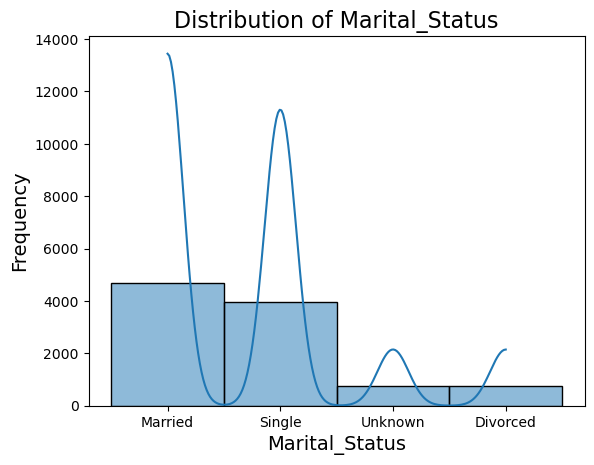

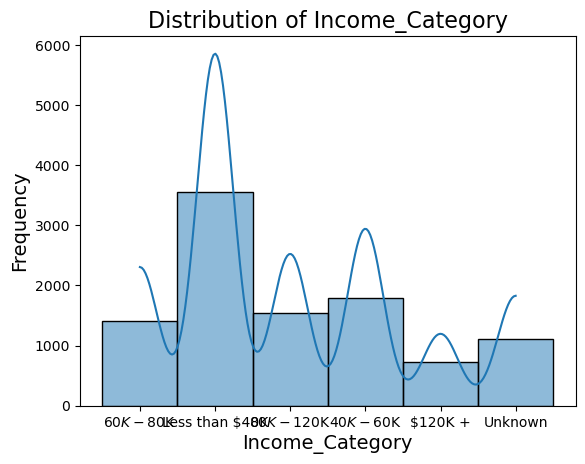

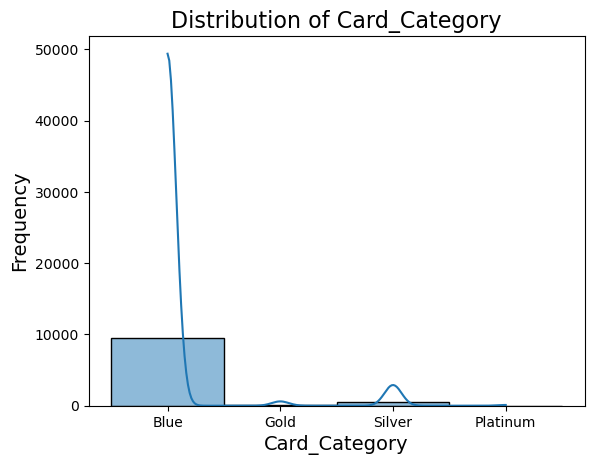

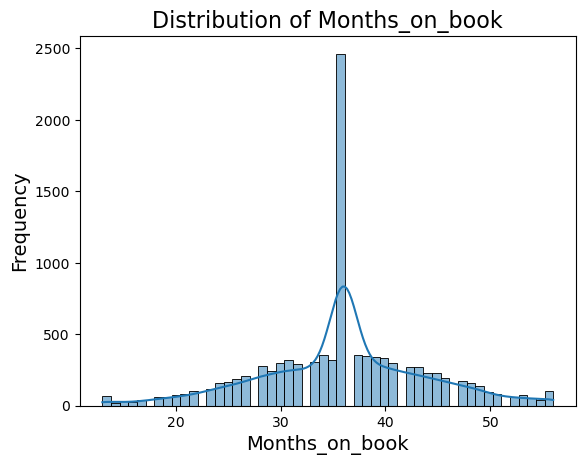

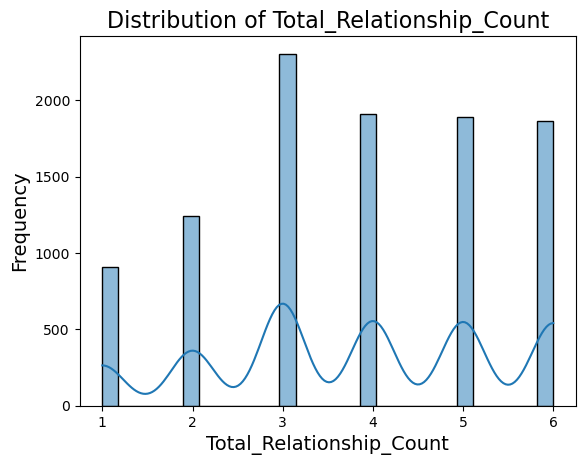

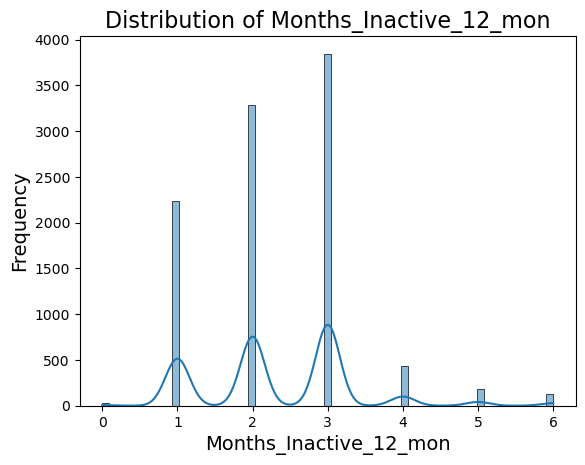

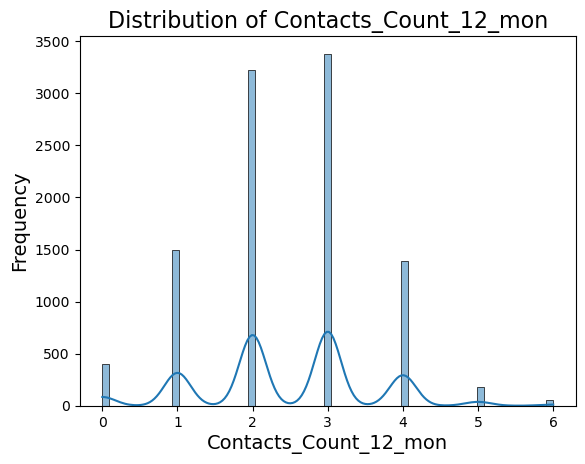

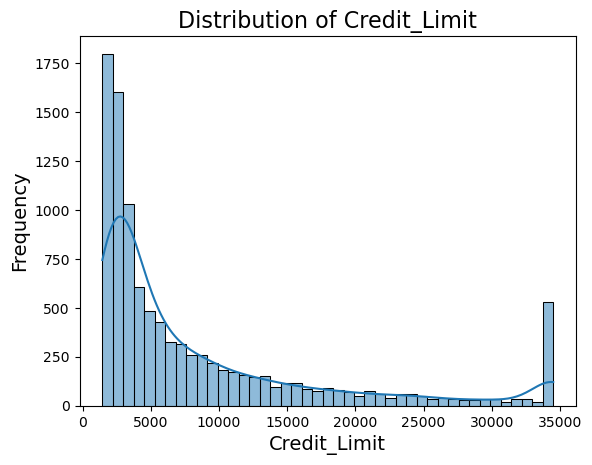

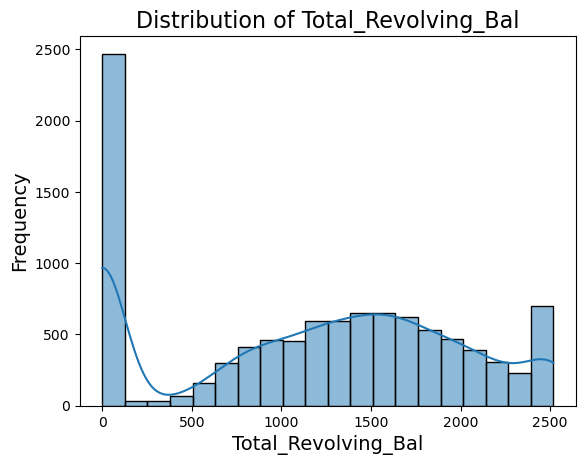

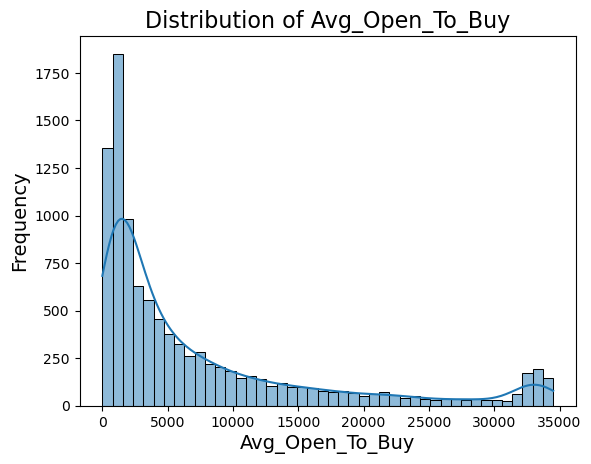

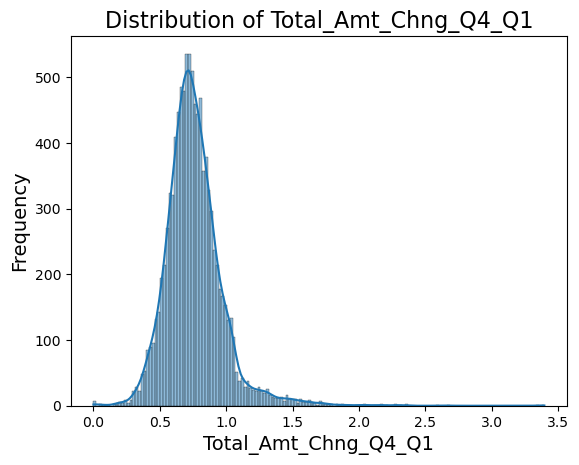

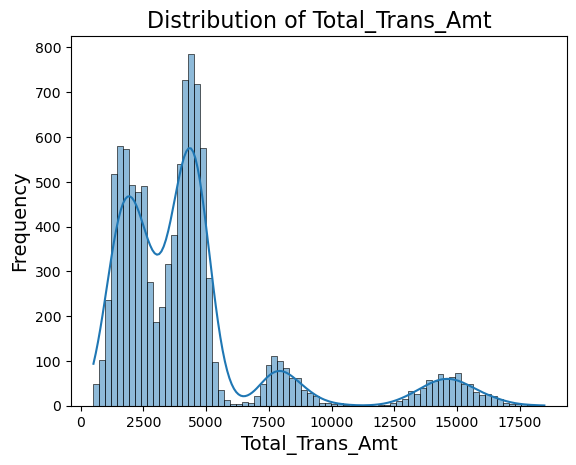

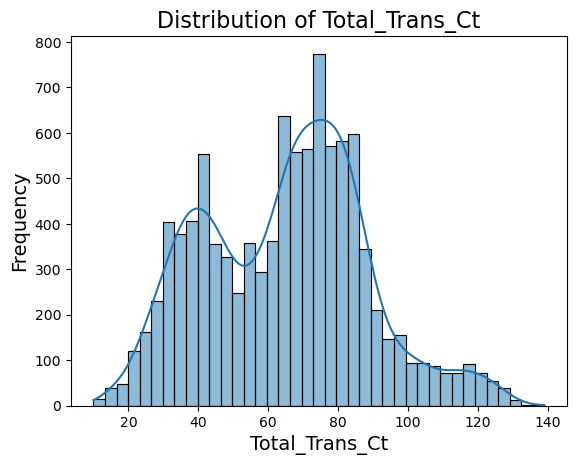

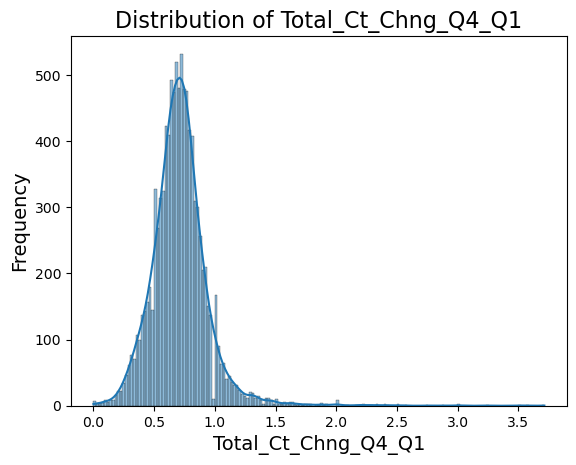

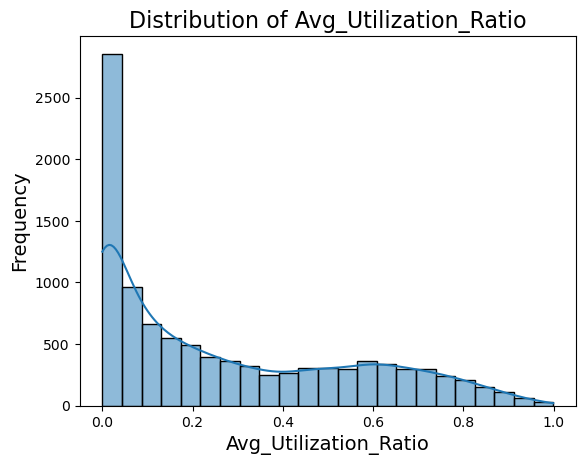

In [7]:
for column_name in data_raw.columns:
    # Plotting the distribution
    sns.histplot(df[column_name], kde=True)
    plt.title(f'Distribution of {column_name}', fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()


# Feature Engineering

In [8]:
# convert bool and object to category 
cat_types = ['bool','object','category']
data_clean = data_raw.copy()
data_clean[data_clean.select_dtypes(cat_types).columns] = data_clean.select_dtypes(cat_types).apply(lambda x: x.astype('category'))
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [9]:
X = data_clean.drop('Attrition_Flag',errors='ignore',axis=1)
codes = {'Existing Customer':0, 'Attrited Customer':1}
data_clean['Attrition_Flag'] = data_clean['Attrition_Flag'].map(codes)
y = data_clean.Attrition_Flag
y.unique()


[0, 1]
Categories (2, int64): [1, 0]

In [10]:
for col in X.select_dtypes('category').columns:
    print(col + ': '+ str(X[col].cat.categories.to_list()))

Gender: ['F', 'M']
Education_Level: ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown']
Marital_Status: ['Divorced', 'Married', 'Single', 'Unknown']
Income_Category: ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown']
Card_Category: ['Blue', 'Gold', 'Platinum', 'Silver']


# Split train and test

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle= True,stratify = y)
y_train.value_counts(), y_test.value_counts()

(Attrition_Flag
 0    6799
 1    1302
 Name: count, dtype: int64,
 Attrition_Flag
 0    1701
 1     325
 Name: count, dtype: int64)

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8101 entries, 2856 to 7469
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer_Age              8101 non-null   int64   
 1   Gender                    8101 non-null   category
 2   Dependent_count           8101 non-null   int64   
 3   Education_Level           8101 non-null   category
 4   Marital_Status            8101 non-null   category
 5   Income_Category           8101 non-null   category
 6   Card_Category             8101 non-null   category
 7   Months_on_book            8101 non-null   int64   
 8   Total_Relationship_Count  8101 non-null   int64   
 9   Months_Inactive_12_mon    8101 non-null   int64   
 10  Contacts_Count_12_mon     8101 non-null   int64   
 11  Credit_Limit              8101 non-null   float64 
 12  Total_Revolving_Bal       8101 non-null   int64   
 13  Avg_Open_To_Buy           8101 non-null   float64 

# CatBoost

In [13]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [14]:
# Getting all column names with category dtype
categorical_features = X_train.select_dtypes(include='category').columns

# Getting the indices of these categorical columns
categorical_indices = [X_train.columns.get_loc(col) for col in categorical_features]
categorical_indices

[1, 3, 4, 5, 6]

In [15]:
# Defining the CatBoostClassifier
cat = CatBoostClassifier()

# Defining the parameter grid
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [50, 100, 200]
}

# Setting up GridSearchCV with CatBoostClassifier
grid_search = GridSearchCV(cat, param_grid=param_grid, scoring='recall', cv=3, verbose=1)

# Fitting GridSearchCV with training data
grid_search.fit(X_train, y_train, cat_features=categorical_indices)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
0:	learn: 0.6861380	total: 61.9ms	remaining: 3.03s
1:	learn: 0.6792884	total: 64.1ms	remaining: 1.54s
2:	learn: 0.6727760	total: 66ms	remaining: 1.03s
3:	learn: 0.6663671	total: 69ms	remaining: 793ms
4:	learn: 0.6603005	total: 71.4ms	remaining: 643ms
5:	learn: 0.6544924	total: 73.6ms	remaining: 540ms
6:	learn: 0.6488410	total: 76.4ms	remaining: 469ms
7:	learn: 0.6432103	total: 79ms	remaining: 415ms
8:	learn: 0.6373483	total: 81.1ms	remaining: 369ms
9:	learn: 0.6314694	total: 83.2ms	remaining: 333ms
10:	learn: 0.6259912	total: 85.8ms	remaining: 304ms
11:	learn: 0.6207071	total: 88.8ms	remaining: 281ms
12:	learn: 0.6156564	total: 90.7ms	remaining: 258ms
13:	learn: 0.6104164	total: 93.1ms	remaining: 240ms
14:	learn: 0.6052768	total: 95.3ms	remaining: 222ms
15:	learn: 0.5998796	total: 97.1ms	remaining: 206ms
16:	learn: 0.5946755	total: 99.1ms	remaining: 192ms
17:	learn: 0.5897853	total: 101ms	remaining: 179ms
18:	learn: 0.5850445

33:	learn: 0.2731444	total: 36.3ms	remaining: 17.1ms
34:	learn: 0.2686895	total: 37.4ms	remaining: 16ms
35:	learn: 0.2648681	total: 38.5ms	remaining: 15ms
36:	learn: 0.2624869	total: 39.6ms	remaining: 13.9ms
37:	learn: 0.2597600	total: 40.5ms	remaining: 12.8ms
38:	learn: 0.2560070	total: 41.5ms	remaining: 11.7ms
39:	learn: 0.2535150	total: 42.5ms	remaining: 10.6ms
40:	learn: 0.2493205	total: 43.7ms	remaining: 9.6ms
41:	learn: 0.2471896	total: 45ms	remaining: 8.57ms
42:	learn: 0.2440628	total: 46.4ms	remaining: 7.55ms
43:	learn: 0.2408267	total: 47.4ms	remaining: 6.47ms
44:	learn: 0.2372571	total: 48.6ms	remaining: 5.4ms
45:	learn: 0.2344882	total: 49.7ms	remaining: 4.33ms
46:	learn: 0.2321351	total: 51ms	remaining: 3.25ms
47:	learn: 0.2286197	total: 52.2ms	remaining: 2.18ms
48:	learn: 0.2272677	total: 53.4ms	remaining: 1.09ms
49:	learn: 0.2239700	total: 54.5ms	remaining: 0us
0:	learn: 0.6612216	total: 1.13ms	remaining: 55.6ms
1:	learn: 0.6303016	total: 2.19ms	remaining: 52.7ms
2:	learn

0:	learn: 0.6309064	total: 936us	remaining: 45.9ms
1:	learn: 0.5755147	total: 1.8ms	remaining: 43.2ms
2:	learn: 0.5322418	total: 2.76ms	remaining: 43.2ms
3:	learn: 0.4919388	total: 3.76ms	remaining: 43.3ms
4:	learn: 0.4641759	total: 4.71ms	remaining: 42.4ms
5:	learn: 0.4375851	total: 5.63ms	remaining: 41.3ms
6:	learn: 0.4095659	total: 6.63ms	remaining: 40.7ms
7:	learn: 0.3886471	total: 7.62ms	remaining: 40ms
8:	learn: 0.3676345	total: 8.47ms	remaining: 38.6ms
9:	learn: 0.3501873	total: 9.68ms	remaining: 38.7ms
10:	learn: 0.3342045	total: 10.7ms	remaining: 38ms
11:	learn: 0.3193491	total: 11.7ms	remaining: 37ms
12:	learn: 0.3065746	total: 12.8ms	remaining: 36.5ms
13:	learn: 0.2962276	total: 13.9ms	remaining: 35.6ms
14:	learn: 0.2862748	total: 15.3ms	remaining: 35.7ms
15:	learn: 0.2756069	total: 16.5ms	remaining: 35ms
16:	learn: 0.2696746	total: 17.6ms	remaining: 34.1ms
17:	learn: 0.2620287	total: 18.5ms	remaining: 32.9ms
18:	learn: 0.2568684	total: 19.5ms	remaining: 31.9ms
19:	learn: 0.

30:	learn: 0.5335033	total: 30.2ms	remaining: 67.3ms
31:	learn: 0.5295433	total: 31.2ms	remaining: 66.3ms
32:	learn: 0.5256856	total: 32.2ms	remaining: 65.4ms
33:	learn: 0.5221165	total: 33.2ms	remaining: 64.4ms
34:	learn: 0.5184291	total: 34.2ms	remaining: 63.6ms
35:	learn: 0.5147284	total: 35.3ms	remaining: 62.7ms
36:	learn: 0.5109685	total: 36.4ms	remaining: 62ms
37:	learn: 0.5074868	total: 37.3ms	remaining: 60.9ms
38:	learn: 0.5038808	total: 38.3ms	remaining: 60ms
39:	learn: 0.5004452	total: 39.3ms	remaining: 59ms
40:	learn: 0.4967613	total: 41.2ms	remaining: 59.3ms
41:	learn: 0.4932233	total: 42.2ms	remaining: 58.3ms
42:	learn: 0.4898901	total: 43.2ms	remaining: 57.3ms
43:	learn: 0.4864308	total: 44.3ms	remaining: 56.4ms
44:	learn: 0.4830251	total: 45.3ms	remaining: 55.4ms
45:	learn: 0.4796551	total: 46.3ms	remaining: 54.4ms
46:	learn: 0.4766093	total: 47.4ms	remaining: 53.5ms
47:	learn: 0.4733253	total: 48.5ms	remaining: 52.5ms
48:	learn: 0.4706770	total: 49.4ms	remaining: 51.4ms

9:	learn: 0.4640039	total: 9.3ms	remaining: 83.7ms
10:	learn: 0.4492816	total: 10.7ms	remaining: 86.7ms
11:	learn: 0.4357062	total: 11.8ms	remaining: 86.9ms
12:	learn: 0.4224677	total: 12.9ms	remaining: 86.3ms
13:	learn: 0.4104241	total: 14.1ms	remaining: 86.5ms
14:	learn: 0.3985346	total: 15.1ms	remaining: 85.8ms
15:	learn: 0.3871813	total: 16.3ms	remaining: 85.6ms
16:	learn: 0.3770388	total: 17.6ms	remaining: 85.8ms
17:	learn: 0.3675435	total: 18.8ms	remaining: 85.5ms
18:	learn: 0.3593683	total: 20.1ms	remaining: 85.7ms
19:	learn: 0.3510520	total: 21.2ms	remaining: 84.9ms
20:	learn: 0.3440138	total: 22.3ms	remaining: 84ms
21:	learn: 0.3360549	total: 23.4ms	remaining: 83ms
22:	learn: 0.3289642	total: 24.6ms	remaining: 82.4ms
23:	learn: 0.3225022	total: 25.7ms	remaining: 81.4ms
24:	learn: 0.3157418	total: 26.8ms	remaining: 80.5ms
25:	learn: 0.3103230	total: 28.5ms	remaining: 81.2ms
26:	learn: 0.3044198	total: 29.8ms	remaining: 80.5ms
27:	learn: 0.2996312	total: 31ms	remaining: 79.7ms
2

77:	learn: 0.1791991	total: 80.5ms	remaining: 22.7ms
78:	learn: 0.1772893	total: 81.7ms	remaining: 21.7ms
79:	learn: 0.1755958	total: 82.8ms	remaining: 20.7ms
80:	learn: 0.1739916	total: 83.9ms	remaining: 19.7ms
81:	learn: 0.1732658	total: 90.1ms	remaining: 19.8ms
82:	learn: 0.1728200	total: 91.5ms	remaining: 18.7ms
83:	learn: 0.1718847	total: 92.9ms	remaining: 17.7ms
84:	learn: 0.1711129	total: 94.1ms	remaining: 16.6ms
85:	learn: 0.1699458	total: 95.2ms	remaining: 15.5ms
86:	learn: 0.1691468	total: 96.4ms	remaining: 14.4ms
87:	learn: 0.1677868	total: 97.4ms	remaining: 13.3ms
88:	learn: 0.1667608	total: 98.6ms	remaining: 12.2ms
89:	learn: 0.1653145	total: 99.9ms	remaining: 11.1ms
90:	learn: 0.1647328	total: 101ms	remaining: 10ms
91:	learn: 0.1638094	total: 102ms	remaining: 8.88ms
92:	learn: 0.1626862	total: 103ms	remaining: 7.77ms
93:	learn: 0.1615224	total: 104ms	remaining: 6.66ms
94:	learn: 0.1607203	total: 105ms	remaining: 5.54ms
95:	learn: 0.1595411	total: 106ms	remaining: 4.43ms
9

45:	learn: 0.1597461	total: 48.9ms	remaining: 57.4ms
46:	learn: 0.1576415	total: 50.1ms	remaining: 56.5ms
47:	learn: 0.1564349	total: 51.2ms	remaining: 55.5ms
48:	learn: 0.1556529	total: 52.4ms	remaining: 54.5ms
49:	learn: 0.1546194	total: 53.5ms	remaining: 53.5ms
50:	learn: 0.1530831	total: 54.4ms	remaining: 52.3ms
51:	learn: 0.1521613	total: 55.7ms	remaining: 51.5ms
52:	learn: 0.1511542	total: 56.7ms	remaining: 50.3ms
53:	learn: 0.1498586	total: 57.7ms	remaining: 49.1ms
54:	learn: 0.1474913	total: 58.7ms	remaining: 48ms
55:	learn: 0.1454520	total: 59.9ms	remaining: 47.1ms
56:	learn: 0.1447312	total: 61ms	remaining: 46ms
57:	learn: 0.1436089	total: 62.2ms	remaining: 45.1ms
58:	learn: 0.1417446	total: 63.3ms	remaining: 44ms
59:	learn: 0.1403897	total: 64.5ms	remaining: 43ms
60:	learn: 0.1389674	total: 65.7ms	remaining: 42ms
61:	learn: 0.1372391	total: 66.6ms	remaining: 40.8ms
62:	learn: 0.1361772	total: 67.8ms	remaining: 39.8ms
63:	learn: 0.1352578	total: 68.7ms	remaining: 38.7ms
64:	l

19:	learn: 0.2468943	total: 19.9ms	remaining: 79.7ms
20:	learn: 0.2425982	total: 21ms	remaining: 79ms
21:	learn: 0.2360547	total: 22ms	remaining: 77.9ms
22:	learn: 0.2303776	total: 22.8ms	remaining: 76.5ms
23:	learn: 0.2250615	total: 23.8ms	remaining: 75.5ms
24:	learn: 0.2208416	total: 24.9ms	remaining: 74.7ms
25:	learn: 0.2185700	total: 25.9ms	remaining: 73.7ms
26:	learn: 0.2124504	total: 27ms	remaining: 73.1ms
27:	learn: 0.2090741	total: 28ms	remaining: 71.9ms
28:	learn: 0.2055526	total: 29.1ms	remaining: 71.2ms
29:	learn: 0.2034786	total: 30.1ms	remaining: 70.2ms
30:	learn: 0.1992136	total: 30.9ms	remaining: 68.9ms
31:	learn: 0.1969596	total: 31.9ms	remaining: 67.8ms
32:	learn: 0.1934421	total: 32.9ms	remaining: 66.7ms
33:	learn: 0.1915070	total: 33.8ms	remaining: 65.6ms
34:	learn: 0.1893570	total: 34.9ms	remaining: 64.8ms
35:	learn: 0.1873072	total: 35.9ms	remaining: 63.8ms
36:	learn: 0.1832977	total: 36.8ms	remaining: 62.6ms
37:	learn: 0.1811115	total: 37.9ms	remaining: 61.8ms
38:

109:	learn: 0.2494224	total: 311ms	remaining: 254ms
110:	learn: 0.2482484	total: 313ms	remaining: 251ms
111:	learn: 0.2474738	total: 316ms	remaining: 248ms
112:	learn: 0.2467331	total: 319ms	remaining: 246ms
113:	learn: 0.2455246	total: 322ms	remaining: 243ms
114:	learn: 0.2447480	total: 325ms	remaining: 240ms
115:	learn: 0.2439997	total: 328ms	remaining: 237ms
116:	learn: 0.2430815	total: 330ms	remaining: 234ms
117:	learn: 0.2421854	total: 333ms	remaining: 232ms
118:	learn: 0.2414421	total: 336ms	remaining: 228ms
119:	learn: 0.2396308	total: 338ms	remaining: 226ms
120:	learn: 0.2388402	total: 341ms	remaining: 223ms
121:	learn: 0.2382734	total: 344ms	remaining: 220ms
122:	learn: 0.2376048	total: 347ms	remaining: 217ms
123:	learn: 0.2360248	total: 350ms	remaining: 214ms
124:	learn: 0.2354170	total: 353ms	remaining: 212ms
125:	learn: 0.2346414	total: 356ms	remaining: 209ms
126:	learn: 0.2337494	total: 358ms	remaining: 206ms
127:	learn: 0.2324892	total: 362ms	remaining: 203ms
128:	learn: 

121:	learn: 0.2363233	total: 344ms	remaining: 220ms
122:	learn: 0.2355107	total: 346ms	remaining: 217ms
123:	learn: 0.2347312	total: 349ms	remaining: 214ms
124:	learn: 0.2340844	total: 351ms	remaining: 211ms
125:	learn: 0.2326226	total: 355ms	remaining: 208ms
126:	learn: 0.2317012	total: 357ms	remaining: 205ms
127:	learn: 0.2310436	total: 360ms	remaining: 203ms
128:	learn: 0.2295613	total: 363ms	remaining: 200ms
129:	learn: 0.2283238	total: 365ms	remaining: 197ms
130:	learn: 0.2277167	total: 368ms	remaining: 194ms
131:	learn: 0.2269584	total: 371ms	remaining: 191ms
132:	learn: 0.2263585	total: 374ms	remaining: 188ms
133:	learn: 0.2256687	total: 376ms	remaining: 185ms
134:	learn: 0.2246260	total: 379ms	remaining: 182ms
135:	learn: 0.2232504	total: 382ms	remaining: 180ms
136:	learn: 0.2224068	total: 385ms	remaining: 177ms
137:	learn: 0.2217755	total: 387ms	remaining: 174ms
138:	learn: 0.2211715	total: 390ms	remaining: 171ms
139:	learn: 0.2205293	total: 393ms	remaining: 168ms
140:	learn: 

132:	learn: 0.2275015	total: 372ms	remaining: 188ms
133:	learn: 0.2261416	total: 376ms	remaining: 185ms
134:	learn: 0.2248988	total: 378ms	remaining: 182ms
135:	learn: 0.2242381	total: 382ms	remaining: 180ms
136:	learn: 0.2236030	total: 385ms	remaining: 177ms
137:	learn: 0.2231575	total: 387ms	remaining: 174ms
138:	learn: 0.2226915	total: 390ms	remaining: 171ms
139:	learn: 0.2221630	total: 398ms	remaining: 171ms
140:	learn: 0.2215450	total: 402ms	remaining: 168ms
141:	learn: 0.2204441	total: 404ms	remaining: 165ms
142:	learn: 0.2199114	total: 407ms	remaining: 162ms
143:	learn: 0.2192779	total: 410ms	remaining: 160ms
144:	learn: 0.2181874	total: 414ms	remaining: 157ms
145:	learn: 0.2176245	total: 417ms	remaining: 154ms
146:	learn: 0.2170730	total: 420ms	remaining: 151ms
147:	learn: 0.2164855	total: 422ms	remaining: 148ms
148:	learn: 0.2161010	total: 425ms	remaining: 146ms
149:	learn: 0.2157024	total: 428ms	remaining: 143ms
150:	learn: 0.2153072	total: 431ms	remaining: 140ms
151:	learn: 

143:	learn: 0.0938254	total: 405ms	remaining: 158ms
144:	learn: 0.0934676	total: 408ms	remaining: 155ms
145:	learn: 0.0929789	total: 411ms	remaining: 152ms
146:	learn: 0.0926817	total: 414ms	remaining: 149ms
147:	learn: 0.0925052	total: 417ms	remaining: 146ms
148:	learn: 0.0918482	total: 420ms	remaining: 144ms
149:	learn: 0.0914024	total: 424ms	remaining: 141ms
150:	learn: 0.0911107	total: 427ms	remaining: 139ms
151:	learn: 0.0905822	total: 430ms	remaining: 136ms
152:	learn: 0.0900963	total: 433ms	remaining: 133ms
153:	learn: 0.0899819	total: 435ms	remaining: 130ms
154:	learn: 0.0898309	total: 438ms	remaining: 127ms
155:	learn: 0.0895944	total: 442ms	remaining: 125ms
156:	learn: 0.0893669	total: 445ms	remaining: 122ms
157:	learn: 0.0891844	total: 448ms	remaining: 119ms
158:	learn: 0.0888392	total: 451ms	remaining: 116ms
159:	learn: 0.0885367	total: 453ms	remaining: 113ms
160:	learn: 0.0884240	total: 457ms	remaining: 111ms
161:	learn: 0.0881231	total: 459ms	remaining: 108ms
162:	learn: 

149:	learn: 0.0957277	total: 432ms	remaining: 144ms
150:	learn: 0.0954703	total: 434ms	remaining: 141ms
151:	learn: 0.0951056	total: 437ms	remaining: 138ms
152:	learn: 0.0948901	total: 440ms	remaining: 135ms
153:	learn: 0.0948766	total: 443ms	remaining: 132ms
154:	learn: 0.0948756	total: 445ms	remaining: 129ms
155:	learn: 0.0946408	total: 447ms	remaining: 126ms
156:	learn: 0.0943595	total: 451ms	remaining: 123ms
157:	learn: 0.0939297	total: 454ms	remaining: 121ms
158:	learn: 0.0939289	total: 457ms	remaining: 118ms
159:	learn: 0.0935616	total: 460ms	remaining: 115ms
160:	learn: 0.0933279	total: 462ms	remaining: 112ms
161:	learn: 0.0931637	total: 465ms	remaining: 109ms
162:	learn: 0.0926532	total: 468ms	remaining: 106ms
163:	learn: 0.0923015	total: 471ms	remaining: 103ms
164:	learn: 0.0919755	total: 473ms	remaining: 100ms
165:	learn: 0.0917548	total: 476ms	remaining: 97.5ms
166:	learn: 0.0912993	total: 479ms	remaining: 94.6ms
167:	learn: 0.0911668	total: 481ms	remaining: 91.7ms
168:	lear

161:	learn: 0.0909247	total: 459ms	remaining: 108ms
162:	learn: 0.0907861	total: 462ms	remaining: 105ms
163:	learn: 0.0905957	total: 465ms	remaining: 102ms
164:	learn: 0.0901177	total: 468ms	remaining: 99.2ms
165:	learn: 0.0895459	total: 471ms	remaining: 96.4ms
166:	learn: 0.0892447	total: 473ms	remaining: 93.6ms
167:	learn: 0.0889846	total: 477ms	remaining: 90.8ms
168:	learn: 0.0886395	total: 480ms	remaining: 88ms
169:	learn: 0.0882729	total: 482ms	remaining: 85.1ms
170:	learn: 0.0880149	total: 485ms	remaining: 82.3ms
171:	learn: 0.0875224	total: 488ms	remaining: 79.5ms
172:	learn: 0.0872793	total: 491ms	remaining: 76.7ms
173:	learn: 0.0870016	total: 494ms	remaining: 73.9ms
174:	learn: 0.0865881	total: 497ms	remaining: 71ms
175:	learn: 0.0862884	total: 499ms	remaining: 68.1ms
176:	learn: 0.0859927	total: 502ms	remaining: 65.2ms
177:	learn: 0.0855619	total: 505ms	remaining: 62.4ms
178:	learn: 0.0854028	total: 508ms	remaining: 59.6ms
179:	learn: 0.0851169	total: 510ms	remaining: 56.7ms


167:	learn: 0.0538700	total: 485ms	remaining: 92.5ms
168:	learn: 0.0537303	total: 488ms	remaining: 89.5ms
169:	learn: 0.0532502	total: 491ms	remaining: 86.7ms
170:	learn: 0.0532015	total: 494ms	remaining: 83.8ms
171:	learn: 0.0531805	total: 497ms	remaining: 81ms
172:	learn: 0.0528679	total: 500ms	remaining: 78ms
173:	learn: 0.0527480	total: 503ms	remaining: 75.2ms
174:	learn: 0.0523003	total: 506ms	remaining: 72.2ms
175:	learn: 0.0520344	total: 509ms	remaining: 69.4ms
176:	learn: 0.0520049	total: 512ms	remaining: 66.5ms
177:	learn: 0.0517395	total: 515ms	remaining: 63.6ms
178:	learn: 0.0516717	total: 518ms	remaining: 60.8ms
179:	learn: 0.0512115	total: 521ms	remaining: 57.8ms
180:	learn: 0.0509860	total: 524ms	remaining: 55ms
181:	learn: 0.0507223	total: 526ms	remaining: 52ms
182:	learn: 0.0504782	total: 530ms	remaining: 49.2ms
183:	learn: 0.0502947	total: 533ms	remaining: 46.3ms
184:	learn: 0.0500825	total: 535ms	remaining: 43.4ms
185:	learn: 0.0498518	total: 538ms	remaining: 40.5ms
1

177:	learn: 0.0569985	total: 500ms	remaining: 61.7ms
178:	learn: 0.0568376	total: 503ms	remaining: 59ms
179:	learn: 0.0565693	total: 506ms	remaining: 56.2ms
180:	learn: 0.0564269	total: 510ms	remaining: 53.5ms
181:	learn: 0.0561958	total: 512ms	remaining: 50.7ms
182:	learn: 0.0558835	total: 515ms	remaining: 47.8ms
183:	learn: 0.0557879	total: 517ms	remaining: 45ms
184:	learn: 0.0556536	total: 520ms	remaining: 42.2ms
185:	learn: 0.0554446	total: 523ms	remaining: 39.3ms
186:	learn: 0.0553355	total: 525ms	remaining: 36.5ms
187:	learn: 0.0552644	total: 529ms	remaining: 33.7ms
188:	learn: 0.0549255	total: 531ms	remaining: 30.9ms
189:	learn: 0.0546710	total: 534ms	remaining: 28.1ms
190:	learn: 0.0546529	total: 537ms	remaining: 25.3ms
191:	learn: 0.0546450	total: 540ms	remaining: 22.5ms
192:	learn: 0.0544398	total: 543ms	remaining: 19.7ms
193:	learn: 0.0544026	total: 546ms	remaining: 16.9ms
194:	learn: 0.0541714	total: 550ms	remaining: 14.1ms
195:	learn: 0.0541697	total: 553ms	remaining: 11.3

183:	learn: 0.0534374	total: 526ms	remaining: 45.7ms
184:	learn: 0.0533747	total: 528ms	remaining: 42.9ms
185:	learn: 0.0531840	total: 531ms	remaining: 40ms
186:	learn: 0.0530335	total: 534ms	remaining: 37.2ms
187:	learn: 0.0527203	total: 538ms	remaining: 34.3ms
188:	learn: 0.0525482	total: 541ms	remaining: 31.5ms
189:	learn: 0.0523866	total: 544ms	remaining: 28.6ms
190:	learn: 0.0522578	total: 546ms	remaining: 25.7ms
191:	learn: 0.0519868	total: 549ms	remaining: 22.9ms
192:	learn: 0.0517681	total: 552ms	remaining: 20ms
193:	learn: 0.0515533	total: 555ms	remaining: 17.2ms
194:	learn: 0.0513525	total: 558ms	remaining: 14.3ms
195:	learn: 0.0512989	total: 560ms	remaining: 11.4ms
196:	learn: 0.0511167	total: 563ms	remaining: 8.57ms
197:	learn: 0.0509837	total: 567ms	remaining: 5.72ms
198:	learn: 0.0507464	total: 570ms	remaining: 2.86ms
199:	learn: 0.0505794	total: 572ms	remaining: 0us
0:	learn: 0.6862465	total: 1.59ms	remaining: 77.7ms
1:	learn: 0.6799133	total: 6.46ms	remaining: 155ms
2:	

7:	learn: 0.4915064	total: 11.2ms	remaining: 58.8ms
8:	learn: 0.4729081	total: 12.6ms	remaining: 57.3ms
9:	learn: 0.4571399	total: 13.9ms	remaining: 55.4ms
10:	learn: 0.4422397	total: 15.3ms	remaining: 54.3ms
11:	learn: 0.4278325	total: 16.7ms	remaining: 52.8ms
12:	learn: 0.4143013	total: 18.3ms	remaining: 52ms
13:	learn: 0.4018123	total: 19.7ms	remaining: 50.7ms
14:	learn: 0.3906519	total: 26.8ms	remaining: 62.5ms
15:	learn: 0.3793236	total: 28.7ms	remaining: 61ms
16:	learn: 0.3675404	total: 30.9ms	remaining: 59.9ms
17:	learn: 0.3587001	total: 32.5ms	remaining: 57.7ms
18:	learn: 0.3481343	total: 34ms	remaining: 55.5ms
19:	learn: 0.3400257	total: 35.5ms	remaining: 53.2ms
20:	learn: 0.3311131	total: 36.9ms	remaining: 50.9ms
21:	learn: 0.3228246	total: 38.3ms	remaining: 48.7ms
22:	learn: 0.3153917	total: 39.8ms	remaining: 46.7ms
23:	learn: 0.3085423	total: 41.2ms	remaining: 44.6ms
24:	learn: 0.3015236	total: 42.6ms	remaining: 42.6ms
25:	learn: 0.2948661	total: 44.2ms	remaining: 40.8ms
26

47:	learn: 0.1366843	total: 74.2ms	remaining: 3.09ms
48:	learn: 0.1350401	total: 75.5ms	remaining: 1.54ms
49:	learn: 0.1329801	total: 76.9ms	remaining: 0us
0:	learn: 0.6862465	total: 1.68ms	remaining: 167ms
1:	learn: 0.6799133	total: 3.08ms	remaining: 151ms
2:	learn: 0.6735539	total: 4.65ms	remaining: 150ms
3:	learn: 0.6672482	total: 6.15ms	remaining: 148ms
4:	learn: 0.6612634	total: 7.49ms	remaining: 142ms
5:	learn: 0.6552857	total: 8.78ms	remaining: 138ms
6:	learn: 0.6493708	total: 10.3ms	remaining: 136ms
7:	learn: 0.6434120	total: 11.6ms	remaining: 133ms
8:	learn: 0.6374640	total: 13ms	remaining: 132ms
9:	learn: 0.6319752	total: 14.4ms	remaining: 130ms
10:	learn: 0.6265612	total: 15.8ms	remaining: 128ms
11:	learn: 0.6209431	total: 17.2ms	remaining: 126ms
12:	learn: 0.6156049	total: 18.6ms	remaining: 124ms
13:	learn: 0.6100763	total: 19.9ms	remaining: 122ms
14:	learn: 0.6044701	total: 21.3ms	remaining: 121ms
15:	learn: 0.5990022	total: 22.7ms	remaining: 119ms
16:	learn: 0.5937855	tot

52:	learn: 0.4510113	total: 77.2ms	remaining: 68.5ms
53:	learn: 0.4479780	total: 78.6ms	remaining: 66.9ms
54:	learn: 0.4450305	total: 80ms	remaining: 65.4ms
55:	learn: 0.4419735	total: 81.5ms	remaining: 64ms
56:	learn: 0.4390956	total: 83ms	remaining: 62.6ms
57:	learn: 0.4361496	total: 84.4ms	remaining: 61.1ms
58:	learn: 0.4334680	total: 85.9ms	remaining: 59.7ms
59:	learn: 0.4306007	total: 87.5ms	remaining: 58.3ms
60:	learn: 0.4275172	total: 88.9ms	remaining: 56.8ms
61:	learn: 0.4247714	total: 90.5ms	remaining: 55.5ms
62:	learn: 0.4221651	total: 91.9ms	remaining: 54ms
63:	learn: 0.4193467	total: 93.5ms	remaining: 52.6ms
64:	learn: 0.4164508	total: 95.1ms	remaining: 51.2ms
65:	learn: 0.4137197	total: 96.4ms	remaining: 49.7ms
66:	learn: 0.4109936	total: 97.9ms	remaining: 48.2ms
67:	learn: 0.4085369	total: 99.4ms	remaining: 46.8ms
68:	learn: 0.4061652	total: 101ms	remaining: 45.3ms
69:	learn: 0.4036451	total: 102ms	remaining: 43.8ms
70:	learn: 0.4010421	total: 104ms	remaining: 42.4ms
71:	

1:	learn: 0.6297143	total: 3.38ms	remaining: 166ms
2:	learn: 0.6025131	total: 4.83ms	remaining: 156ms
3:	learn: 0.5772017	total: 6.07ms	remaining: 146ms
4:	learn: 0.5528612	total: 7.33ms	remaining: 139ms
5:	learn: 0.5309049	total: 8.6ms	remaining: 135ms
6:	learn: 0.5114453	total: 9.84ms	remaining: 131ms
7:	learn: 0.4914240	total: 11.4ms	remaining: 131ms
8:	learn: 0.4729109	total: 12.9ms	remaining: 131ms
9:	learn: 0.4556447	total: 14.4ms	remaining: 130ms
10:	learn: 0.4405670	total: 15.8ms	remaining: 128ms
11:	learn: 0.4260662	total: 17.4ms	remaining: 127ms
12:	learn: 0.4117383	total: 18.8ms	remaining: 126ms
13:	learn: 0.3997523	total: 20.2ms	remaining: 124ms
14:	learn: 0.3877191	total: 21.9ms	remaining: 124ms
15:	learn: 0.3758190	total: 23.4ms	remaining: 123ms
16:	learn: 0.3640183	total: 24.9ms	remaining: 121ms
17:	learn: 0.3552584	total: 26.3ms	remaining: 120ms
18:	learn: 0.3459111	total: 27.9ms	remaining: 119ms
19:	learn: 0.3379651	total: 29.4ms	remaining: 118ms
20:	learn: 0.3286315	t

54:	learn: 0.1249609	total: 83.2ms	remaining: 68.1ms
55:	learn: 0.1238390	total: 84.7ms	remaining: 66.6ms
56:	learn: 0.1220207	total: 86.2ms	remaining: 65.1ms
57:	learn: 0.1212601	total: 87.7ms	remaining: 63.5ms
58:	learn: 0.1206341	total: 89.1ms	remaining: 61.9ms
59:	learn: 0.1197868	total: 90.5ms	remaining: 60.4ms
60:	learn: 0.1184941	total: 91.9ms	remaining: 58.7ms
61:	learn: 0.1173968	total: 93.4ms	remaining: 57.2ms
62:	learn: 0.1162142	total: 100ms	remaining: 58.8ms
63:	learn: 0.1153604	total: 103ms	remaining: 57.7ms
64:	learn: 0.1144395	total: 104ms	remaining: 56.2ms
65:	learn: 0.1132013	total: 106ms	remaining: 54.5ms
66:	learn: 0.1116311	total: 108ms	remaining: 53ms
67:	learn: 0.1110080	total: 109ms	remaining: 51.3ms
68:	learn: 0.1101243	total: 110ms	remaining: 49.6ms
69:	learn: 0.1091576	total: 112ms	remaining: 47.9ms
70:	learn: 0.1083550	total: 113ms	remaining: 46.3ms
71:	learn: 0.1077576	total: 116ms	remaining: 45ms
72:	learn: 0.1074401	total: 117ms	remaining: 43.4ms
73:	lear

45:	learn: 0.3412739	total: 161ms	remaining: 538ms
46:	learn: 0.3377184	total: 164ms	remaining: 535ms
47:	learn: 0.3344860	total: 168ms	remaining: 532ms
48:	learn: 0.3310263	total: 171ms	remaining: 528ms
49:	learn: 0.3272307	total: 175ms	remaining: 524ms
50:	learn: 0.3226634	total: 178ms	remaining: 520ms
51:	learn: 0.3197516	total: 182ms	remaining: 517ms
52:	learn: 0.3170968	total: 185ms	remaining: 513ms
53:	learn: 0.3132773	total: 188ms	remaining: 510ms
54:	learn: 0.3105721	total: 193ms	remaining: 508ms
55:	learn: 0.3076867	total: 196ms	remaining: 504ms
56:	learn: 0.3048352	total: 199ms	remaining: 500ms
57:	learn: 0.3015737	total: 203ms	remaining: 498ms
58:	learn: 0.2980927	total: 207ms	remaining: 494ms
59:	learn: 0.2947155	total: 211ms	remaining: 491ms
60:	learn: 0.2930171	total: 214ms	remaining: 488ms
61:	learn: 0.2897196	total: 218ms	remaining: 484ms
62:	learn: 0.2878513	total: 221ms	remaining: 480ms
63:	learn: 0.2860122	total: 224ms	remaining: 477ms
64:	learn: 0.2839339	total: 228

13:	learn: 0.5288645	total: 47.9ms	remaining: 637ms
14:	learn: 0.5201289	total: 51ms	remaining: 629ms
15:	learn: 0.5115289	total: 54ms	remaining: 621ms
16:	learn: 0.5021670	total: 57.7ms	remaining: 622ms
17:	learn: 0.4937037	total: 62.3ms	remaining: 630ms
18:	learn: 0.4858532	total: 65.7ms	remaining: 626ms
19:	learn: 0.4779519	total: 69.2ms	remaining: 623ms
20:	learn: 0.4701961	total: 72.6ms	remaining: 619ms
21:	learn: 0.4622683	total: 76.2ms	remaining: 617ms
22:	learn: 0.4537668	total: 79.8ms	remaining: 614ms
23:	learn: 0.4472568	total: 83.3ms	remaining: 611ms
24:	learn: 0.4389571	total: 86.5ms	remaining: 605ms
25:	learn: 0.4317785	total: 89.7ms	remaining: 600ms
26:	learn: 0.4257404	total: 93ms	remaining: 596ms
27:	learn: 0.4197587	total: 96.6ms	remaining: 593ms
28:	learn: 0.4137970	total: 100ms	remaining: 590ms
29:	learn: 0.4076070	total: 103ms	remaining: 586ms
30:	learn: 0.4022885	total: 107ms	remaining: 582ms
31:	learn: 0.3972214	total: 111ms	remaining: 585ms
32:	learn: 0.3895259	t

182:	learn: 0.1537481	total: 651ms	remaining: 60.5ms
183:	learn: 0.1533054	total: 655ms	remaining: 56.9ms
184:	learn: 0.1528847	total: 658ms	remaining: 53.3ms
185:	learn: 0.1525738	total: 661ms	remaining: 49.8ms
186:	learn: 0.1522377	total: 665ms	remaining: 46.2ms
187:	learn: 0.1518344	total: 669ms	remaining: 42.7ms
188:	learn: 0.1511614	total: 672ms	remaining: 39.1ms
189:	learn: 0.1506468	total: 676ms	remaining: 35.6ms
190:	learn: 0.1500866	total: 680ms	remaining: 32ms
191:	learn: 0.1498312	total: 683ms	remaining: 28.5ms
192:	learn: 0.1494025	total: 687ms	remaining: 24.9ms
193:	learn: 0.1489859	total: 690ms	remaining: 21.3ms
194:	learn: 0.1486725	total: 694ms	remaining: 17.8ms
195:	learn: 0.1482029	total: 697ms	remaining: 14.2ms
196:	learn: 0.1476356	total: 701ms	remaining: 10.7ms
197:	learn: 0.1472538	total: 705ms	remaining: 7.12ms
198:	learn: 0.1468717	total: 708ms	remaining: 3.56ms
199:	learn: 0.1465020	total: 712ms	remaining: 0us
0:	learn: 0.6794121	total: 3.58ms	remaining: 713ms


150:	learn: 0.1765754	total: 535ms	remaining: 173ms
151:	learn: 0.1762321	total: 538ms	remaining: 170ms
152:	learn: 0.1753448	total: 541ms	remaining: 166ms
153:	learn: 0.1745082	total: 545ms	remaining: 163ms
154:	learn: 0.1737473	total: 548ms	remaining: 159ms
155:	learn: 0.1729504	total: 551ms	remaining: 155ms
156:	learn: 0.1720733	total: 555ms	remaining: 152ms
157:	learn: 0.1714331	total: 559ms	remaining: 149ms
158:	learn: 0.1709291	total: 562ms	remaining: 145ms
159:	learn: 0.1704246	total: 566ms	remaining: 141ms
160:	learn: 0.1699629	total: 569ms	remaining: 138ms
161:	learn: 0.1691270	total: 572ms	remaining: 134ms
162:	learn: 0.1687370	total: 576ms	remaining: 131ms
163:	learn: 0.1684166	total: 580ms	remaining: 127ms
164:	learn: 0.1676395	total: 583ms	remaining: 124ms
165:	learn: 0.1666698	total: 587ms	remaining: 120ms
166:	learn: 0.1658720	total: 591ms	remaining: 117ms
167:	learn: 0.1655101	total: 594ms	remaining: 113ms
168:	learn: 0.1646386	total: 597ms	remaining: 110ms
169:	learn: 

114:	learn: 0.0789417	total: 420ms	remaining: 310ms
115:	learn: 0.0784187	total: 424ms	remaining: 307ms
116:	learn: 0.0782045	total: 428ms	remaining: 304ms
117:	learn: 0.0777401	total: 431ms	remaining: 300ms
118:	learn: 0.0773978	total: 435ms	remaining: 296ms
119:	learn: 0.0771620	total: 439ms	remaining: 293ms
120:	learn: 0.0767214	total: 442ms	remaining: 289ms
121:	learn: 0.0761471	total: 446ms	remaining: 285ms
122:	learn: 0.0755687	total: 450ms	remaining: 282ms
123:	learn: 0.0753883	total: 453ms	remaining: 278ms
124:	learn: 0.0751318	total: 457ms	remaining: 274ms
125:	learn: 0.0745912	total: 460ms	remaining: 270ms
126:	learn: 0.0741971	total: 464ms	remaining: 267ms
127:	learn: 0.0738961	total: 469ms	remaining: 264ms
128:	learn: 0.0733819	total: 472ms	remaining: 260ms
129:	learn: 0.0728413	total: 476ms	remaining: 256ms
130:	learn: 0.0728132	total: 478ms	remaining: 252ms
131:	learn: 0.0726939	total: 482ms	remaining: 248ms
132:	learn: 0.0722731	total: 485ms	remaining: 244ms
133:	learn: 

81:	learn: 0.0999048	total: 292ms	remaining: 420ms
82:	learn: 0.0987565	total: 295ms	remaining: 416ms
83:	learn: 0.0981567	total: 300ms	remaining: 414ms
84:	learn: 0.0973818	total: 304ms	remaining: 411ms
85:	learn: 0.0965847	total: 307ms	remaining: 408ms
86:	learn: 0.0960434	total: 311ms	remaining: 404ms
87:	learn: 0.0956435	total: 315ms	remaining: 400ms
88:	learn: 0.0948589	total: 318ms	remaining: 397ms
89:	learn: 0.0945654	total: 321ms	remaining: 393ms
90:	learn: 0.0937743	total: 325ms	remaining: 389ms
91:	learn: 0.0935864	total: 328ms	remaining: 385ms
92:	learn: 0.0930945	total: 332ms	remaining: 382ms
93:	learn: 0.0924301	total: 336ms	remaining: 379ms
94:	learn: 0.0917653	total: 340ms	remaining: 375ms
95:	learn: 0.0914029	total: 343ms	remaining: 372ms
96:	learn: 0.0914020	total: 345ms	remaining: 367ms
97:	learn: 0.0910467	total: 349ms	remaining: 363ms
98:	learn: 0.0906540	total: 352ms	remaining: 360ms
99:	learn: 0.0902352	total: 356ms	remaining: 356ms
100:	learn: 0.0898316	total: 35

53:	learn: 0.1259904	total: 192ms	remaining: 520ms
54:	learn: 0.1246545	total: 196ms	remaining: 516ms
55:	learn: 0.1232093	total: 199ms	remaining: 511ms
56:	learn: 0.1224351	total: 202ms	remaining: 508ms
57:	learn: 0.1210814	total: 206ms	remaining: 504ms
58:	learn: 0.1195579	total: 209ms	remaining: 500ms
59:	learn: 0.1183323	total: 214ms	remaining: 500ms
60:	learn: 0.1174106	total: 217ms	remaining: 495ms
61:	learn: 0.1160271	total: 221ms	remaining: 491ms
62:	learn: 0.1146259	total: 224ms	remaining: 488ms
63:	learn: 0.1138433	total: 228ms	remaining: 485ms
64:	learn: 0.1126027	total: 233ms	remaining: 483ms
65:	learn: 0.1120205	total: 237ms	remaining: 481ms
66:	learn: 0.1109262	total: 240ms	remaining: 477ms
67:	learn: 0.1099882	total: 244ms	remaining: 473ms
68:	learn: 0.1096242	total: 247ms	remaining: 470ms
69:	learn: 0.1091477	total: 251ms	remaining: 465ms
70:	learn: 0.1086662	total: 254ms	remaining: 461ms
71:	learn: 0.1080988	total: 257ms	remaining: 458ms
72:	learn: 0.1074507	total: 261

20:	learn: 0.1397941	total: 76.1ms	remaining: 649ms
21:	learn: 0.1361909	total: 79.7ms	remaining: 645ms
22:	learn: 0.1334995	total: 83ms	remaining: 639ms
23:	learn: 0.1294634	total: 86.6ms	remaining: 635ms
24:	learn: 0.1258872	total: 89.8ms	remaining: 628ms
25:	learn: 0.1245815	total: 94.1ms	remaining: 630ms
26:	learn: 0.1217693	total: 97.5ms	remaining: 625ms
27:	learn: 0.1195988	total: 101ms	remaining: 621ms
28:	learn: 0.1166771	total: 105ms	remaining: 617ms
29:	learn: 0.1149600	total: 108ms	remaining: 614ms
30:	learn: 0.1120057	total: 112ms	remaining: 609ms
31:	learn: 0.1098038	total: 116ms	remaining: 609ms
32:	learn: 0.1073083	total: 120ms	remaining: 605ms
33:	learn: 0.1053083	total: 123ms	remaining: 602ms
34:	learn: 0.1040173	total: 127ms	remaining: 598ms
35:	learn: 0.1017340	total: 130ms	remaining: 594ms
36:	learn: 0.0994821	total: 134ms	remaining: 591ms
37:	learn: 0.0975368	total: 138ms	remaining: 588ms
38:	learn: 0.0963443	total: 142ms	remaining: 584ms
39:	learn: 0.0944003	total

188:	learn: 0.0300168	total: 681ms	remaining: 39.6ms
189:	learn: 0.0296700	total: 684ms	remaining: 36ms
190:	learn: 0.0293078	total: 688ms	remaining: 32.4ms
191:	learn: 0.0292568	total: 697ms	remaining: 29ms
192:	learn: 0.0289728	total: 701ms	remaining: 25.4ms
193:	learn: 0.0288826	total: 704ms	remaining: 21.8ms
194:	learn: 0.0287487	total: 708ms	remaining: 18.1ms
195:	learn: 0.0284106	total: 711ms	remaining: 14.5ms
196:	learn: 0.0281685	total: 715ms	remaining: 10.9ms
197:	learn: 0.0279546	total: 719ms	remaining: 7.26ms
198:	learn: 0.0277791	total: 722ms	remaining: 3.63ms
199:	learn: 0.0276644	total: 725ms	remaining: 0us
0:	learn: 0.5744853	total: 3.3ms	remaining: 658ms
1:	learn: 0.4816982	total: 6.35ms	remaining: 629ms
2:	learn: 0.4061825	total: 9.8ms	remaining: 644ms
3:	learn: 0.3439336	total: 13.2ms	remaining: 648ms
4:	learn: 0.3151981	total: 16.9ms	remaining: 659ms
5:	learn: 0.2869387	total: 20.8ms	remaining: 672ms
6:	learn: 0.2526745	total: 24ms	remaining: 661ms
7:	learn: 0.234878

159:	learn: 0.0413070	total: 551ms	remaining: 138ms
160:	learn: 0.0409279	total: 555ms	remaining: 134ms
161:	learn: 0.0405743	total: 558ms	remaining: 131ms
162:	learn: 0.0400702	total: 561ms	remaining: 127ms
163:	learn: 0.0400508	total: 565ms	remaining: 124ms
164:	learn: 0.0397689	total: 568ms	remaining: 121ms
165:	learn: 0.0393807	total: 572ms	remaining: 117ms
166:	learn: 0.0390617	total: 575ms	remaining: 114ms
167:	learn: 0.0389383	total: 579ms	remaining: 110ms
168:	learn: 0.0385899	total: 582ms	remaining: 107ms
169:	learn: 0.0383002	total: 586ms	remaining: 103ms
170:	learn: 0.0380458	total: 589ms	remaining: 99.9ms
171:	learn: 0.0380431	total: 593ms	remaining: 96.6ms
172:	learn: 0.0378367	total: 597ms	remaining: 93.2ms
173:	learn: 0.0376651	total: 601ms	remaining: 89.8ms
174:	learn: 0.0374762	total: 605ms	remaining: 86.4ms
175:	learn: 0.0373086	total: 609ms	remaining: 83ms
176:	learn: 0.0370410	total: 613ms	remaining: 79.6ms
177:	learn: 0.0367603	total: 616ms	remaining: 76.1ms
178:	l

126:	learn: 0.0448511	total: 454ms	remaining: 261ms
127:	learn: 0.0443936	total: 458ms	remaining: 258ms
128:	learn: 0.0441791	total: 461ms	remaining: 254ms
129:	learn: 0.0438604	total: 465ms	remaining: 250ms
130:	learn: 0.0434630	total: 469ms	remaining: 247ms
131:	learn: 0.0432511	total: 472ms	remaining: 243ms
132:	learn: 0.0427614	total: 476ms	remaining: 240ms
133:	learn: 0.0426389	total: 480ms	remaining: 236ms
134:	learn: 0.0423261	total: 483ms	remaining: 233ms
135:	learn: 0.0420575	total: 487ms	remaining: 229ms
136:	learn: 0.0417473	total: 490ms	remaining: 226ms
137:	learn: 0.0414565	total: 494ms	remaining: 222ms
138:	learn: 0.0411382	total: 498ms	remaining: 218ms
139:	learn: 0.0409857	total: 502ms	remaining: 215ms
140:	learn: 0.0407414	total: 506ms	remaining: 212ms
141:	learn: 0.0406121	total: 510ms	remaining: 208ms
142:	learn: 0.0405427	total: 513ms	remaining: 205ms
143:	learn: 0.0402794	total: 517ms	remaining: 201ms
144:	learn: 0.0402115	total: 521ms	remaining: 197ms
145:	learn: 

35:	learn: 0.5127074	total: 80.8ms	remaining: 31.4ms
36:	learn: 0.5085491	total: 83.3ms	remaining: 29.3ms
37:	learn: 0.5047086	total: 85.6ms	remaining: 27ms
38:	learn: 0.5007771	total: 88.4ms	remaining: 24.9ms
39:	learn: 0.4971625	total: 91.5ms	remaining: 22.9ms
40:	learn: 0.4936249	total: 93.9ms	remaining: 20.6ms
41:	learn: 0.4900292	total: 96.1ms	remaining: 18.3ms
42:	learn: 0.4863241	total: 98.4ms	remaining: 16ms
43:	learn: 0.4825842	total: 101ms	remaining: 13.7ms
44:	learn: 0.4788724	total: 103ms	remaining: 11.4ms
45:	learn: 0.4754534	total: 106ms	remaining: 9.21ms
46:	learn: 0.4724018	total: 108ms	remaining: 6.9ms
47:	learn: 0.4689811	total: 110ms	remaining: 4.6ms
48:	learn: 0.4658977	total: 112ms	remaining: 2.29ms
49:	learn: 0.4628520	total: 115ms	remaining: 0us
0:	learn: 0.6593054	total: 1.57ms	remaining: 76.9ms
1:	learn: 0.6309429	total: 3.79ms	remaining: 90.9ms
2:	learn: 0.6039985	total: 5.88ms	remaining: 92.1ms
3:	learn: 0.5800866	total: 7.98ms	remaining: 91.8ms
4:	learn: 0.5

47:	learn: 0.1949509	total: 111ms	remaining: 4.61ms
48:	learn: 0.1918820	total: 113ms	remaining: 2.31ms
49:	learn: 0.1892070	total: 115ms	remaining: 0us
0:	learn: 0.6271142	total: 1.37ms	remaining: 67.1ms
1:	learn: 0.5776311	total: 3.79ms	remaining: 91ms
2:	learn: 0.5315137	total: 5.46ms	remaining: 85.6ms
3:	learn: 0.4924283	total: 7.76ms	remaining: 89.3ms
4:	learn: 0.4626219	total: 9.85ms	remaining: 88.7ms
5:	learn: 0.4332794	total: 12.2ms	remaining: 89.5ms
6:	learn: 0.4075966	total: 14.4ms	remaining: 88.7ms
7:	learn: 0.3812579	total: 17.2ms	remaining: 90.4ms
8:	learn: 0.3623644	total: 19.2ms	remaining: 87.7ms
9:	learn: 0.3428616	total: 21.7ms	remaining: 86.7ms
10:	learn: 0.3248749	total: 24.1ms	remaining: 85.5ms
11:	learn: 0.3085911	total: 26.4ms	remaining: 83.5ms
12:	learn: 0.2952599	total: 28.8ms	remaining: 81.9ms
13:	learn: 0.2819475	total: 30.9ms	remaining: 79.5ms
14:	learn: 0.2698514	total: 33.3ms	remaining: 77.8ms
15:	learn: 0.2577639	total: 35.6ms	remaining: 75.6ms
16:	learn: 

89:	learn: 0.3639283	total: 208ms	remaining: 23.1ms
90:	learn: 0.3616361	total: 210ms	remaining: 20.8ms
91:	learn: 0.3597144	total: 212ms	remaining: 18.5ms
92:	learn: 0.3578588	total: 215ms	remaining: 16.2ms
93:	learn: 0.3557728	total: 217ms	remaining: 13.9ms
94:	learn: 0.3537851	total: 220ms	remaining: 11.6ms
95:	learn: 0.3516687	total: 222ms	remaining: 9.24ms
96:	learn: 0.3499245	total: 224ms	remaining: 6.93ms
97:	learn: 0.3478577	total: 226ms	remaining: 4.62ms
98:	learn: 0.3459126	total: 229ms	remaining: 2.31ms
99:	learn: 0.3441700	total: 232ms	remaining: 0us
0:	learn: 0.6860899	total: 2.17ms	remaining: 215ms
1:	learn: 0.6793130	total: 4.43ms	remaining: 217ms
2:	learn: 0.6734430	total: 6.57ms	remaining: 212ms
3:	learn: 0.6675745	total: 8.58ms	remaining: 206ms
4:	learn: 0.6615878	total: 10.7ms	remaining: 204ms
5:	learn: 0.6556114	total: 13ms	remaining: 204ms
6:	learn: 0.6499470	total: 15.3ms	remaining: 204ms
7:	learn: 0.6441324	total: 17.4ms	remaining: 200ms
8:	learn: 0.6383721	total

56:	learn: 0.4406830	total: 131ms	remaining: 98.6ms
57:	learn: 0.4377014	total: 133ms	remaining: 96.3ms
58:	learn: 0.4347007	total: 135ms	remaining: 93.9ms
59:	learn: 0.4318401	total: 137ms	remaining: 91.6ms
60:	learn: 0.4291104	total: 140ms	remaining: 89.4ms
61:	learn: 0.4265164	total: 142ms	remaining: 87.2ms
62:	learn: 0.4237690	total: 145ms	remaining: 84.9ms
63:	learn: 0.4213694	total: 147ms	remaining: 82.5ms
64:	learn: 0.4188928	total: 149ms	remaining: 80.2ms
65:	learn: 0.4158896	total: 151ms	remaining: 77.8ms
66:	learn: 0.4128656	total: 154ms	remaining: 75.8ms
67:	learn: 0.4106175	total: 156ms	remaining: 73.5ms
68:	learn: 0.4081068	total: 158ms	remaining: 71.1ms
69:	learn: 0.4053526	total: 161ms	remaining: 68.8ms
70:	learn: 0.4031798	total: 163ms	remaining: 66.5ms
71:	learn: 0.4006751	total: 165ms	remaining: 64.2ms
72:	learn: 0.3980065	total: 167ms	remaining: 61.9ms
73:	learn: 0.3955135	total: 170ms	remaining: 59.7ms
74:	learn: 0.3931801	total: 172ms	remaining: 57.5ms
75:	learn: 0

20:	learn: 0.3320855	total: 46.5ms	remaining: 175ms
21:	learn: 0.3230730	total: 48.7ms	remaining: 173ms
22:	learn: 0.3152235	total: 51.1ms	remaining: 171ms
23:	learn: 0.3083440	total: 53.4ms	remaining: 169ms
24:	learn: 0.3012182	total: 55.5ms	remaining: 167ms
25:	learn: 0.2960920	total: 57.8ms	remaining: 164ms
26:	learn: 0.2897770	total: 60.2ms	remaining: 163ms
27:	learn: 0.2825965	total: 62.6ms	remaining: 161ms
28:	learn: 0.2769480	total: 65.3ms	remaining: 160ms
29:	learn: 0.2707530	total: 67.6ms	remaining: 158ms
30:	learn: 0.2650175	total: 70.1ms	remaining: 156ms
31:	learn: 0.2597695	total: 72.4ms	remaining: 154ms
32:	learn: 0.2549556	total: 74.6ms	remaining: 151ms
33:	learn: 0.2494529	total: 77.6ms	remaining: 151ms
34:	learn: 0.2448184	total: 79.9ms	remaining: 148ms
35:	learn: 0.2397445	total: 82ms	remaining: 146ms
36:	learn: 0.2355043	total: 84.5ms	remaining: 144ms
37:	learn: 0.2311705	total: 86.9ms	remaining: 142ms
38:	learn: 0.2267152	total: 89ms	remaining: 139ms
39:	learn: 0.223

83:	learn: 0.1354215	total: 201ms	remaining: 38.3ms
84:	learn: 0.1346336	total: 204ms	remaining: 35.9ms
85:	learn: 0.1335414	total: 206ms	remaining: 33.5ms
86:	learn: 0.1329925	total: 209ms	remaining: 31.3ms
87:	learn: 0.1319896	total: 211ms	remaining: 28.8ms
88:	learn: 0.1311388	total: 214ms	remaining: 26.4ms
89:	learn: 0.1296158	total: 217ms	remaining: 24.1ms
90:	learn: 0.1285307	total: 219ms	remaining: 21.7ms
91:	learn: 0.1277427	total: 222ms	remaining: 19.3ms
92:	learn: 0.1264455	total: 224ms	remaining: 16.9ms
93:	learn: 0.1254810	total: 227ms	remaining: 14.5ms
94:	learn: 0.1244253	total: 229ms	remaining: 12.1ms
95:	learn: 0.1237696	total: 232ms	remaining: 9.64ms
96:	learn: 0.1230051	total: 234ms	remaining: 7.23ms
97:	learn: 0.1223677	total: 236ms	remaining: 4.82ms
98:	learn: 0.1215037	total: 238ms	remaining: 2.41ms
99:	learn: 0.1205982	total: 241ms	remaining: 0us
0:	learn: 0.6271142	total: 1.46ms	remaining: 144ms
1:	learn: 0.5776311	total: 3.82ms	remaining: 187ms
2:	learn: 0.53151

44:	learn: 0.1262496	total: 105ms	remaining: 128ms
45:	learn: 0.1239598	total: 107ms	remaining: 126ms
46:	learn: 0.1225089	total: 109ms	remaining: 123ms
47:	learn: 0.1208122	total: 112ms	remaining: 122ms
48:	learn: 0.1200406	total: 115ms	remaining: 120ms
49:	learn: 0.1182186	total: 117ms	remaining: 117ms
50:	learn: 0.1167131	total: 120ms	remaining: 115ms
51:	learn: 0.1157214	total: 123ms	remaining: 113ms
52:	learn: 0.1142802	total: 125ms	remaining: 111ms
53:	learn: 0.1127230	total: 127ms	remaining: 108ms
54:	learn: 0.1108103	total: 130ms	remaining: 106ms
55:	learn: 0.1093772	total: 132ms	remaining: 104ms
56:	learn: 0.1088903	total: 135ms	remaining: 102ms
57:	learn: 0.1079069	total: 138ms	remaining: 99.6ms
58:	learn: 0.1065365	total: 140ms	remaining: 97.3ms
59:	learn: 0.1056323	total: 142ms	remaining: 94.9ms
60:	learn: 0.1048654	total: 145ms	remaining: 92.5ms
61:	learn: 0.1037395	total: 148ms	remaining: 90.7ms
62:	learn: 0.1029573	total: 150ms	remaining: 88.2ms
63:	learn: 0.1021623	tota

43:	learn: 0.3300096	total: 214ms	remaining: 760ms
44:	learn: 0.3260254	total: 219ms	remaining: 756ms
45:	learn: 0.3224942	total: 224ms	remaining: 748ms
46:	learn: 0.3189218	total: 229ms	remaining: 746ms
47:	learn: 0.3156911	total: 234ms	remaining: 741ms
48:	learn: 0.3119741	total: 239ms	remaining: 738ms
49:	learn: 0.3099523	total: 244ms	remaining: 732ms
50:	learn: 0.3066200	total: 249ms	remaining: 728ms
51:	learn: 0.3021852	total: 254ms	remaining: 723ms
52:	learn: 0.2987805	total: 260ms	remaining: 720ms
53:	learn: 0.2966290	total: 265ms	remaining: 715ms
54:	learn: 0.2921505	total: 270ms	remaining: 712ms
55:	learn: 0.2886345	total: 275ms	remaining: 706ms
56:	learn: 0.2845569	total: 280ms	remaining: 702ms
57:	learn: 0.2804654	total: 285ms	remaining: 697ms
58:	learn: 0.2779109	total: 290ms	remaining: 693ms
59:	learn: 0.2754570	total: 295ms	remaining: 688ms
60:	learn: 0.2721825	total: 300ms	remaining: 684ms
61:	learn: 0.2695474	total: 305ms	remaining: 679ms
62:	learn: 0.2668168	total: 310

40:	learn: 0.3437996	total: 206ms	remaining: 798ms
41:	learn: 0.3393614	total: 210ms	remaining: 791ms
42:	learn: 0.3350761	total: 216ms	remaining: 787ms
43:	learn: 0.3293630	total: 221ms	remaining: 784ms
44:	learn: 0.3252165	total: 226ms	remaining: 778ms
45:	learn: 0.3217759	total: 231ms	remaining: 773ms
46:	learn: 0.3182767	total: 237ms	remaining: 772ms
47:	learn: 0.3146351	total: 242ms	remaining: 766ms
48:	learn: 0.3111885	total: 246ms	remaining: 759ms
49:	learn: 0.3075495	total: 251ms	remaining: 754ms
50:	learn: 0.3047981	total: 255ms	remaining: 746ms
51:	learn: 0.3001084	total: 260ms	remaining: 740ms
52:	learn: 0.2959397	total: 265ms	remaining: 735ms
53:	learn: 0.2925743	total: 269ms	remaining: 728ms
54:	learn: 0.2884559	total: 275ms	remaining: 724ms
55:	learn: 0.2852210	total: 279ms	remaining: 718ms
56:	learn: 0.2808072	total: 284ms	remaining: 714ms
57:	learn: 0.2771230	total: 289ms	remaining: 707ms
58:	learn: 0.2731029	total: 294ms	remaining: 701ms
59:	learn: 0.2700591	total: 298

0:	learn: 0.6793961	total: 4.04ms	remaining: 804ms
1:	learn: 0.6662346	total: 8.99ms	remaining: 891ms
2:	learn: 0.6525627	total: 13.2ms	remaining: 867ms
3:	learn: 0.6402018	total: 18.2ms	remaining: 892ms
4:	learn: 0.6272833	total: 22.7ms	remaining: 884ms
5:	learn: 0.6149989	total: 27.9ms	remaining: 902ms
6:	learn: 0.6026186	total: 32.5ms	remaining: 895ms
7:	learn: 0.5906781	total: 36.7ms	remaining: 880ms
8:	learn: 0.5801847	total: 41.5ms	remaining: 880ms
9:	learn: 0.5699095	total: 46.6ms	remaining: 886ms
10:	learn: 0.5606133	total: 51ms	remaining: 876ms
11:	learn: 0.5502047	total: 55.5ms	remaining: 870ms
12:	learn: 0.5402383	total: 60ms	remaining: 863ms
13:	learn: 0.5299129	total: 65.6ms	remaining: 872ms
14:	learn: 0.5203711	total: 70.6ms	remaining: 871ms
15:	learn: 0.5087655	total: 75.5ms	remaining: 869ms
16:	learn: 0.4994306	total: 80.3ms	remaining: 864ms
17:	learn: 0.4916544	total: 86.2ms	remaining: 871ms
18:	learn: 0.4829044	total: 91ms	remaining: 867ms
19:	learn: 0.4730832	total: 

163:	learn: 0.1450634	total: 815ms	remaining: 179ms
164:	learn: 0.1442950	total: 820ms	remaining: 174ms
165:	learn: 0.1436467	total: 826ms	remaining: 169ms
166:	learn: 0.1430075	total: 830ms	remaining: 164ms
167:	learn: 0.1422872	total: 836ms	remaining: 159ms
168:	learn: 0.1419054	total: 841ms	remaining: 154ms
169:	learn: 0.1414598	total: 846ms	remaining: 149ms
170:	learn: 0.1408550	total: 851ms	remaining: 144ms
171:	learn: 0.1404817	total: 857ms	remaining: 139ms
172:	learn: 0.1399947	total: 862ms	remaining: 135ms
173:	learn: 0.1393403	total: 868ms	remaining: 130ms
174:	learn: 0.1387502	total: 872ms	remaining: 125ms
175:	learn: 0.1379535	total: 878ms	remaining: 120ms
176:	learn: 0.1374893	total: 882ms	remaining: 115ms
177:	learn: 0.1368322	total: 887ms	remaining: 110ms
178:	learn: 0.1361965	total: 893ms	remaining: 105ms
179:	learn: 0.1357426	total: 898ms	remaining: 99.7ms
180:	learn: 0.1353827	total: 902ms	remaining: 94.7ms
181:	learn: 0.1348580	total: 908ms	remaining: 89.8ms
182:	lear

125:	learn: 0.0581390	total: 618ms	remaining: 363ms
126:	learn: 0.0579214	total: 624ms	remaining: 359ms
127:	learn: 0.0573475	total: 629ms	remaining: 354ms
128:	learn: 0.0570319	total: 634ms	remaining: 349ms
129:	learn: 0.0566564	total: 638ms	remaining: 344ms
130:	learn: 0.0561228	total: 643ms	remaining: 339ms
131:	learn: 0.0560898	total: 646ms	remaining: 333ms
132:	learn: 0.0557988	total: 651ms	remaining: 328ms
133:	learn: 0.0552307	total: 656ms	remaining: 323ms
134:	learn: 0.0548710	total: 660ms	remaining: 318ms
135:	learn: 0.0545801	total: 665ms	remaining: 313ms
136:	learn: 0.0541278	total: 670ms	remaining: 308ms
137:	learn: 0.0540036	total: 676ms	remaining: 304ms
138:	learn: 0.0537057	total: 680ms	remaining: 298ms
139:	learn: 0.0535005	total: 685ms	remaining: 293ms
140:	learn: 0.0531684	total: 690ms	remaining: 289ms
141:	learn: 0.0530360	total: 695ms	remaining: 284ms
142:	learn: 0.0524755	total: 700ms	remaining: 279ms
143:	learn: 0.0521032	total: 706ms	remaining: 274ms
144:	learn: 

86:	learn: 0.0785632	total: 431ms	remaining: 559ms
87:	learn: 0.0779173	total: 436ms	remaining: 555ms
88:	learn: 0.0773236	total: 441ms	remaining: 550ms
89:	learn: 0.0773200	total: 444ms	remaining: 542ms
90:	learn: 0.0765388	total: 448ms	remaining: 536ms
91:	learn: 0.0760327	total: 459ms	remaining: 539ms
92:	learn: 0.0760317	total: 461ms	remaining: 531ms
93:	learn: 0.0753906	total: 466ms	remaining: 526ms
94:	learn: 0.0746676	total: 472ms	remaining: 521ms
95:	learn: 0.0746658	total: 475ms	remaining: 515ms
96:	learn: 0.0741459	total: 480ms	remaining: 509ms
97:	learn: 0.0740057	total: 485ms	remaining: 504ms
98:	learn: 0.0735846	total: 489ms	remaining: 499ms
99:	learn: 0.0735678	total: 494ms	remaining: 494ms
100:	learn: 0.0734562	total: 497ms	remaining: 487ms
101:	learn: 0.0733883	total: 502ms	remaining: 482ms
102:	learn: 0.0731198	total: 507ms	remaining: 478ms
103:	learn: 0.0728824	total: 511ms	remaining: 472ms
104:	learn: 0.0728819	total: 514ms	remaining: 465ms
105:	learn: 0.0723110	tota

53:	learn: 0.1017131	total: 272ms	remaining: 735ms
54:	learn: 0.1007542	total: 276ms	remaining: 729ms
55:	learn: 0.1002477	total: 282ms	remaining: 725ms
56:	learn: 0.0987470	total: 287ms	remaining: 719ms
57:	learn: 0.0978472	total: 292ms	remaining: 715ms
58:	learn: 0.0968733	total: 297ms	remaining: 710ms
59:	learn: 0.0961848	total: 303ms	remaining: 707ms
60:	learn: 0.0945034	total: 308ms	remaining: 702ms
61:	learn: 0.0935133	total: 313ms	remaining: 697ms
62:	learn: 0.0928596	total: 319ms	remaining: 693ms
63:	learn: 0.0918609	total: 324ms	remaining: 689ms
64:	learn: 0.0916653	total: 327ms	remaining: 680ms
65:	learn: 0.0907559	total: 332ms	remaining: 673ms
66:	learn: 0.0897698	total: 337ms	remaining: 668ms
67:	learn: 0.0890414	total: 341ms	remaining: 663ms
68:	learn: 0.0884973	total: 347ms	remaining: 659ms
69:	learn: 0.0875471	total: 352ms	remaining: 653ms
70:	learn: 0.0868474	total: 358ms	remaining: 650ms
71:	learn: 0.0859999	total: 362ms	remaining: 644ms
72:	learn: 0.0847293	total: 367

14:	learn: 0.1498265	total: 77.8ms	remaining: 959ms
15:	learn: 0.1432593	total: 82.9ms	remaining: 954ms
16:	learn: 0.1381365	total: 87.9ms	remaining: 946ms
17:	learn: 0.1345212	total: 93.8ms	remaining: 948ms
18:	learn: 0.1301162	total: 98.3ms	remaining: 936ms
19:	learn: 0.1250322	total: 103ms	remaining: 929ms
20:	learn: 0.1210224	total: 108ms	remaining: 920ms
21:	learn: 0.1173501	total: 112ms	remaining: 910ms
22:	learn: 0.1147104	total: 118ms	remaining: 907ms
23:	learn: 0.1123362	total: 123ms	remaining: 900ms
24:	learn: 0.1092919	total: 128ms	remaining: 899ms
25:	learn: 0.1064714	total: 134ms	remaining: 897ms
26:	learn: 0.1033503	total: 139ms	remaining: 889ms
27:	learn: 0.1007534	total: 144ms	remaining: 886ms
28:	learn: 0.0997301	total: 150ms	remaining: 882ms
29:	learn: 0.0968347	total: 155ms	remaining: 877ms
30:	learn: 0.0940664	total: 160ms	remaining: 870ms
31:	learn: 0.0923796	total: 166ms	remaining: 871ms
32:	learn: 0.0908276	total: 171ms	remaining: 864ms
33:	learn: 0.0903848	total

175:	learn: 0.0170847	total: 885ms	remaining: 121ms
176:	learn: 0.0169545	total: 890ms	remaining: 116ms
177:	learn: 0.0166518	total: 895ms	remaining: 111ms
178:	learn: 0.0164676	total: 900ms	remaining: 106ms
179:	learn: 0.0164168	total: 905ms	remaining: 101ms
180:	learn: 0.0162707	total: 910ms	remaining: 95.5ms
181:	learn: 0.0161588	total: 915ms	remaining: 90.5ms
182:	learn: 0.0161153	total: 920ms	remaining: 85.5ms
183:	learn: 0.0160373	total: 925ms	remaining: 80.5ms
184:	learn: 0.0159823	total: 931ms	remaining: 75.5ms
185:	learn: 0.0158266	total: 936ms	remaining: 70.4ms
186:	learn: 0.0157688	total: 941ms	remaining: 65.4ms
187:	learn: 0.0157239	total: 945ms	remaining: 60.3ms
188:	learn: 0.0155507	total: 950ms	remaining: 55.3ms
189:	learn: 0.0154199	total: 955ms	remaining: 50.3ms
190:	learn: 0.0153396	total: 960ms	remaining: 45.3ms
191:	learn: 0.0152346	total: 965ms	remaining: 40.2ms
192:	learn: 0.0151593	total: 971ms	remaining: 35.2ms
193:	learn: 0.0151115	total: 975ms	remaining: 30.2m

138:	learn: 0.0328234	total: 678ms	remaining: 298ms
139:	learn: 0.0327534	total: 683ms	remaining: 293ms
140:	learn: 0.0327226	total: 689ms	remaining: 288ms
141:	learn: 0.0323677	total: 694ms	remaining: 283ms
142:	learn: 0.0319832	total: 699ms	remaining: 279ms
143:	learn: 0.0313982	total: 704ms	remaining: 274ms
144:	learn: 0.0312798	total: 709ms	remaining: 269ms
145:	learn: 0.0307749	total: 714ms	remaining: 264ms
146:	learn: 0.0304533	total: 720ms	remaining: 260ms
147:	learn: 0.0301406	total: 726ms	remaining: 255ms
148:	learn: 0.0298330	total: 731ms	remaining: 250ms
149:	learn: 0.0296877	total: 736ms	remaining: 245ms
150:	learn: 0.0294451	total: 742ms	remaining: 241ms
151:	learn: 0.0292796	total: 747ms	remaining: 236ms
152:	learn: 0.0290150	total: 753ms	remaining: 231ms
153:	learn: 0.0287383	total: 757ms	remaining: 226ms
154:	learn: 0.0284647	total: 762ms	remaining: 221ms
155:	learn: 0.0282148	total: 767ms	remaining: 216ms
156:	learn: 0.0280625	total: 773ms	remaining: 212ms
157:	learn: 

135:	learn: 0.0281474	total: 683ms	remaining: 322ms
136:	learn: 0.0277375	total: 689ms	remaining: 317ms
137:	learn: 0.0275806	total: 694ms	remaining: 312ms
138:	learn: 0.0272315	total: 699ms	remaining: 307ms
139:	learn: 0.0269619	total: 704ms	remaining: 302ms
140:	learn: 0.0266043	total: 709ms	remaining: 297ms
141:	learn: 0.0264239	total: 714ms	remaining: 291ms
142:	learn: 0.0260476	total: 718ms	remaining: 286ms
143:	learn: 0.0257963	total: 723ms	remaining: 281ms
144:	learn: 0.0256380	total: 727ms	remaining: 276ms
145:	learn: 0.0253765	total: 732ms	remaining: 271ms
146:	learn: 0.0253248	total: 737ms	remaining: 266ms
147:	learn: 0.0250103	total: 742ms	remaining: 261ms
148:	learn: 0.0247996	total: 748ms	remaining: 256ms
149:	learn: 0.0245623	total: 752ms	remaining: 251ms
150:	learn: 0.0243107	total: 757ms	remaining: 246ms
151:	learn: 0.0240235	total: 762ms	remaining: 241ms
152:	learn: 0.0239686	total: 767ms	remaining: 236ms
153:	learn: 0.0236893	total: 772ms	remaining: 231ms
154:	learn: 

129:	learn: 0.0693053	total: 475ms	remaining: 256ms
130:	learn: 0.0690550	total: 478ms	remaining: 252ms
131:	learn: 0.0685984	total: 482ms	remaining: 248ms
132:	learn: 0.0684182	total: 485ms	remaining: 245ms
133:	learn: 0.0682335	total: 489ms	remaining: 241ms
134:	learn: 0.0680519	total: 493ms	remaining: 237ms
135:	learn: 0.0677669	total: 497ms	remaining: 234ms
136:	learn: 0.0674847	total: 500ms	remaining: 230ms
137:	learn: 0.0673411	total: 504ms	remaining: 226ms
138:	learn: 0.0670158	total: 507ms	remaining: 223ms
139:	learn: 0.0667821	total: 511ms	remaining: 219ms
140:	learn: 0.0664906	total: 514ms	remaining: 215ms
141:	learn: 0.0662290	total: 518ms	remaining: 212ms
142:	learn: 0.0659928	total: 521ms	remaining: 208ms
143:	learn: 0.0656658	total: 525ms	remaining: 204ms
144:	learn: 0.0651090	total: 529ms	remaining: 201ms
145:	learn: 0.0649723	total: 533ms	remaining: 197ms
146:	learn: 0.0647896	total: 537ms	remaining: 194ms
147:	learn: 0.0645355	total: 540ms	remaining: 190ms
148:	learn: 

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x177680990>,
             param_grid={'depth': [4, 6, 8], 'iterations': [50, 100, 200],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='recall', verbose=1)

In [16]:
# Print best parameters and best recall score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

Best Parameters: {'depth': 4, 'iterations': 200, 'learning_rate': 0.1}
Best Recall Score: 0.890937019969278


In [33]:
# Refit model with best parameters, specifying categorical features again
best_cat = grid_search.best_estimator_
best_cat.fit(X_train, y_train, cat_features=categorical_indices)

# Make predictions on the validation set, specifying categorical features again
y_pred = best_cat.predict(X_test)

0:	learn: 0.5797768	total: 7.38ms	remaining: 1.47s
1:	learn: 0.4953808	total: 12.7ms	remaining: 1.26s
2:	learn: 0.4304256	total: 18.1ms	remaining: 1.19s
3:	learn: 0.3741064	total: 24.7ms	remaining: 1.21s
4:	learn: 0.3416712	total: 29.8ms	remaining: 1.16s
5:	learn: 0.3203208	total: 35.9ms	remaining: 1.16s
6:	learn: 0.3015507	total: 41.5ms	remaining: 1.14s
7:	learn: 0.2821341	total: 45.6ms	remaining: 1.09s
8:	learn: 0.2689275	total: 50ms	remaining: 1.06s
9:	learn: 0.2479917	total: 55.2ms	remaining: 1.05s
10:	learn: 0.2384000	total: 59.7ms	remaining: 1.02s
11:	learn: 0.2310278	total: 64.5ms	remaining: 1.01s
12:	learn: 0.2253454	total: 68.1ms	remaining: 979ms
13:	learn: 0.2203254	total: 72.8ms	remaining: 968ms
14:	learn: 0.2152816	total: 76.4ms	remaining: 942ms
15:	learn: 0.2054597	total: 81ms	remaining: 932ms
16:	learn: 0.2014208	total: 85.1ms	remaining: 916ms
17:	learn: 0.1969901	total: 89.1ms	remaining: 901ms
18:	learn: 0.1935699	total: 92.3ms	remaining: 879ms
19:	learn: 0.1862380	total

In [34]:
# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.97      0.86      0.91       325

    accuracy                           0.97      2026
   macro avg       0.97      0.93      0.95      2026
weighted avg       0.97      0.97      0.97      2026



# Feature Importance

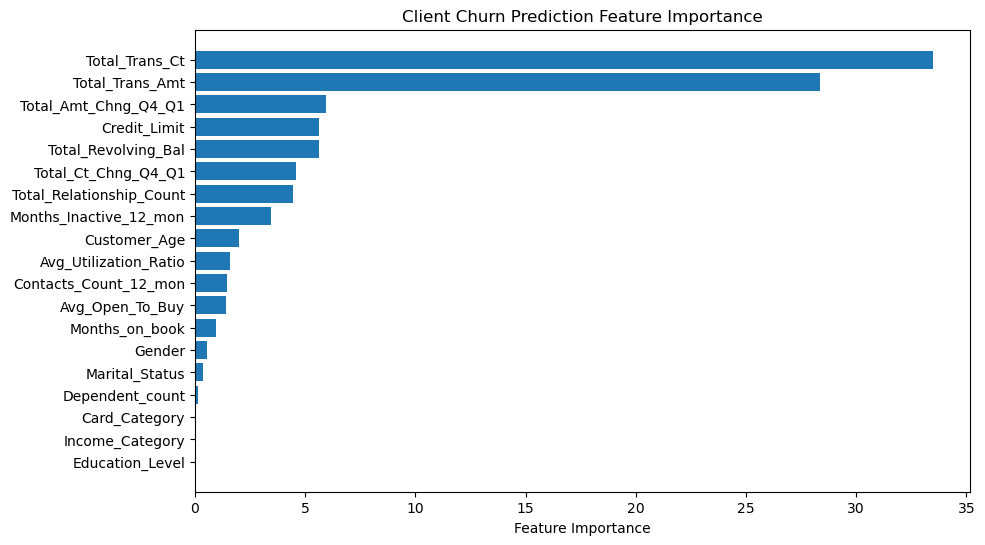

In [38]:
feature_importances = best_cat.get_feature_importance(Pool(X_train, label=y_train, cat_features=categorical_indices))

# Create a dataframe to store feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.xlabel('Feature Importance')
plt.title('Client Churn Prediction Feature Importance')
plt.show()

In [17]:
# Other Models
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, recall_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# one-hot encoding categorical features (label encoding)
for col in X.select_dtypes('category').columns:
    dummies = pd.get_dummies(X[[col]])
    X = pd.concat([X, dummies], axis=1)
    X = X.drop([col], axis=1)
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,False,False,True,False,False,False,True,False,False,False
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,False,False,False,False,True,False,True,False,False,False
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,False,False,False,True,False,False,True,False,False,False
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,False,False,False,False,True,False,True,False,False,False
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,False,False,True,False,False,False,True,False,False,False


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    10127 non-null  int64  
 1   Dependent_count                 10127 non-null  int64  
 2   Months_on_book                  10127 non-null  int64  
 3   Total_Relationship_Count        10127 non-null  int64  
 4   Months_Inactive_12_mon          10127 non-null  int64  
 5   Contacts_Count_12_mon           10127 non-null  int64  
 6   Credit_Limit                    10127 non-null  float64
 7   Total_Revolving_Bal             10127 non-null  int64  
 8   Avg_Open_To_Buy                 10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 10  Total_Trans_Amt                 10127 non-null  int64  
 11  Total_Trans_Ct                  10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1             

In [15]:
#Train-Test Stratfied Split with stratify

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,shuffle= True,stratify = y)
y_train.value_counts(), y_val.value_counts()

(Attrition_Flag
 0    6799
 1    1302
 Name: count, dtype: int64,
 Attrition_Flag
 0    1701
 1     325
 Name: count, dtype: int64)

# Random Forest

In [23]:
# Perform grid search cross-validation

# Define the model
rf = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [20, 30, 40],
    'min_samples_split': [3, 5, 7]
}

# Define the cross-validation strategy
cv = KFold(n_splits=3, random_state=42, shuffle=True)

# Set up the GridSearchCV with recall as the scoring metric
random_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='recall_macro', n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Best Recall Score: {random_search.best_score_}")


Best Hyperparameters: {'max_depth': 40, 'min_samples_split': 5, 'n_estimators': 200}
Best Recall Score: 0.8833867437687953


In [25]:
# Train the final model with the best hyperparameters
best_rf = RandomForestClassifier(**random_search.best_params_)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_val)
recall = recall_score(y_val, y_pred, average='binary')  
print(f"Recall on test set: {recall}")

Recall on test set: 0.7661538461538462


# LightGBM

In [30]:
import lightgbm as lgb

In [31]:
clf = lgb.LGBMClassifier()

param_grid = {
    'boosting_type': ['gbdt'],
    'objective': ['binary'],                # Binary classification
    'num_leaves': [20, 30, 40],             # Maximum number of leaves in one tree
    'learning_rate': [0.05, 0.1, 0.2],      # Learning rate (shrinkage)
    'feature_fraction': [0.8, 0.9, 1.0],    # Percentage of features to consider
    'bagging_fraction': [0.8, 0.9, 1.0],    # Percentage of data to use in each iteration (bagging)
    'bagging_freq': [5, 10, 15],            # Frequency for bagging
}

scoring = {'recall': make_scorer(recall_score)}

boost_search = GridSearchCV(clf, param_grid=param_grid, scoring=scoring, refit='recall',
                           cv=3, verbose=1, n_jobs=-1)
boost_search.fit(X_train, y_train)



Fitting 3 folds for each of 243 candidates, totalling 729 fits
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] fe

GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'bagging_fraction': [0.8, 0.9, 1.0],
                         'bagging_freq': [5, 10, 15], 'boosting_type': ['gbdt'],
                         'feature_fraction': [0.8, 0.9, 1.0],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'num_leaves': [20, 30, 40], 'objective': ['binary']},
             refit='recall',
             scoring={'recall': make_scorer(recall_score, response_method='predict')},
             verbose=1)

In [36]:
# Best parameters found during grid search
print(f'Best parameters: {boost_search.best_params_}')
best_params = boost_search.best_params_


Best parameters: {'bagging_fraction': 0.8, 'bagging_freq': 15, 'boosting_type': 'gbdt', 'feature_fraction': 1.0, 'learning_rate': 0.2, 'num_leaves': 30, 'objective': 'binary'}


In [37]:
# Define the XGBoost model with the best hyperparameters
best_model = lgb.LGBMClassifier(**best_params)

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train)

# Predict on test set using the best model
y_pred = best_model.predict(X_val)

# Calculate recall
recall = recall_score(y_val, y_pred)
print(f'Recall: {recall:.4f}')

# Display classification report (precision, recall, F1-score, support)
print(classification_report(y_val, y_pred))

[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Number of positive: 1302, number of negative: 6799
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000800 seconds.
You can set `force_row_wise=true` to remove t

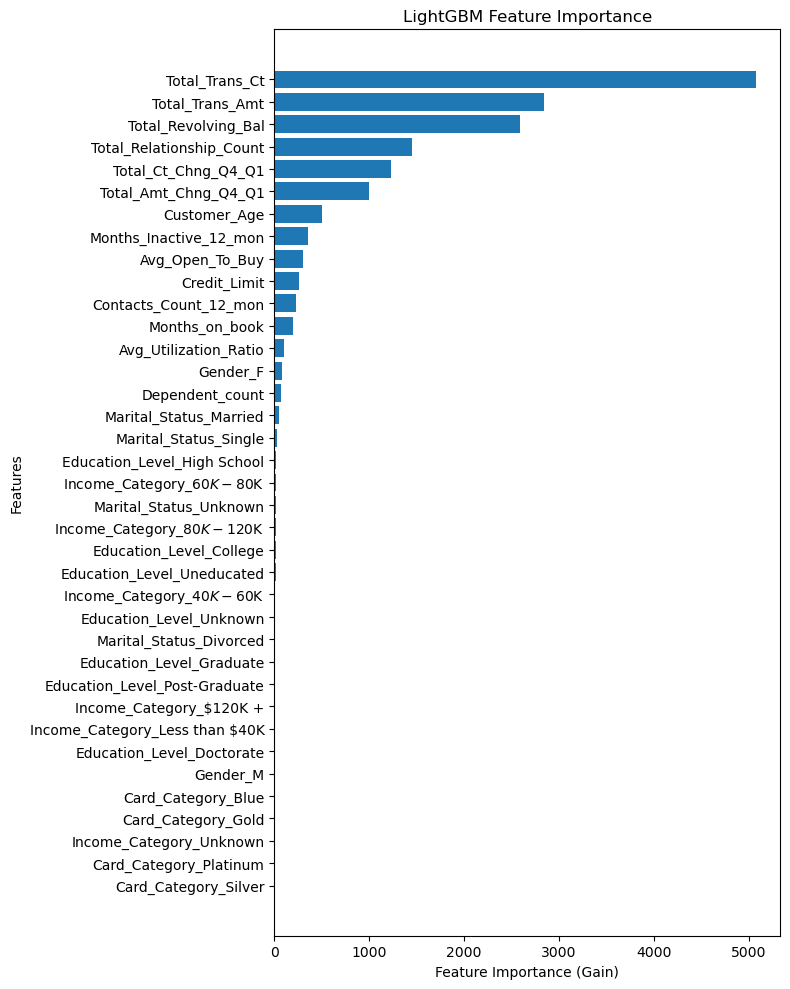

In [40]:
# Get the underlying LightGBM Booster object
booster = best_model.booster_

# Get feature importance
feature_importance = booster.feature_importance(importance_type='gain')

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(8, 10))  # Adjust the figure size as needed
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X_train.columns[sorted_idx])
plt.xlabel('Feature Importance (Gain)')
plt.ylabel('Features')
plt.title('LightGBM Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.tight_layout()
plt.show()